# Exploratory Analysis of Dataset

In [1]:
# load dependencies
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

## Load dataset

In [2]:
path = '../Raw_Data/'
filename = 'dataset.csv'
path_filename = path + filename
dataset_df = pd.read_csv(path_filename, delimiter=',')
dataset_df

year     state  population_million  education_million  welfare_million  \
0     1970  National             203.302            56456.0          18738.8   
1     1971  National             205.515            63469.0          27364.3   
2     1972  National             207.752            71351.0          30594.3   
3     1973  National             210.013            75849.0          28944.9   
4     1974  National             212.299            81440.0          34816.4   
...    ...       ...                 ...                ...              ...   
2959  2022   Wyoming               0.587             2759.1            347.9   
2960  2023   Wyoming               0.589             2745.8            349.3   
2961  2024   Wyoming               0.591             2755.2            351.3   
2962  2025   Wyoming               0.594             2793.8            354.9   
2963  2026   Wyoming               0.596             2865.6            360.8   

      crime_rate  unemployment_rate  divorce_rate_per_1000_people  \
0          363.5                NaN                          3.50   
1          396.0                NaN                          3.75   
2          401.0                NaN                          4.00   
3          417.4                NaN                          4.25   
4          461.1                NaN                          4.50   
...          ...                ...                           ...   
2959         NaN                NaN                           NaN   
2960         NaN                NaN                           NaN   
2961         NaN                NaN                           NaN   
2962         NaN                NaN                           NaN   
2963         NaN                NaN                           NaN   

      homeownership_rate  minimum_wage_effective  CPI_Average  inflation_rate  \
0                    NaN                1.382353         38.8             5.8   
1                    NaN                1.382353         40.5             4.3   
2                    NaN                1.623529         41.8             3.3   
3                    NaN                1.623529         44.4             6.2   
4                    NaN                1.623529         49.3            11.1   
...                  ...                     ...          ...             ...   
2959                 NaN                     NaN          NaN             NaN   
2960                 NaN                     NaN          NaN             NaN   
2961                 NaN                     NaN          NaN             NaN   
2962                 NaN                     NaN          NaN             NaN   
2963                 NaN                     NaN          NaN             NaN   

      avg_wage_index  poverty_rate  
0            6186.24         17.18  
1            6497.08         17.05  
2            7133.80         16.12  
3            7580.16         15.13  
4            8030.76         15.86  
...              ...           ...  
2959             NaN           NaN  
2960             NaN           NaN  
2961             NaN           NaN  
2962             NaN           NaN  
2963             NaN           NaN  

[2964 rows x 14 columns]

In [3]:
# Helper functions
import math
import matplotlib.pyplot as plt

# Generate boxplots for all numeric variables (!= 'object') in the DataFrame.
# plots are generated 5 variables per row.
def boxplots(df):
    numeric_features = df.dtypes[df.dtypes!='object'].index.tolist()
    i,j=0,0
    PLOTS_PER_ROW = 5
    rows_plots = math.ceil(len(numeric_features)/PLOTS_PER_ROW)
    fig, axs = plt.subplots(rows_plots,PLOTS_PER_ROW, figsize=(20, 5*rows_plots))
    for col in numeric_features:
        if (rows_plots == 1):
            axs[j].boxplot(df[col].dropna())
            axs[j].set_title(col)
        else:
            axs[i][j].boxplot(df[col].dropna())
            axs[i][j].set_title(col)
        j+=1
        if j%PLOTS_PER_ROW==0:
            i+=1
            j=0
    plt.show()

# Generate histograms with 20 bins for all numeric variables (!= 'object') in the DataFrame.
# plots are generated 5 variables per row.
def histograms(df):
    numeric_features = df.dtypes[df.dtypes!='object'].index.tolist()
    i,j=0,0
    PLOTS_PER_ROW = 5
    rows_plots = math.ceil(len(numeric_features)/PLOTS_PER_ROW)
    fig, axs = plt.subplots(rows_plots,PLOTS_PER_ROW, figsize=(20, 5*rows_plots))
    for col in numeric_features:
        if (rows_plots == 1):
            axs[j].hist(df[col].dropna(), alpha=0.5, bins=20)
            axs[j].set_title(col)
        else:
            axs[i][j].hist(df[col].dropna(), alpha=0.5, bins=20)
            axs[i][j].set_title(col)
        j+=1
        if j%PLOTS_PER_ROW==0:
            i+=1
            j=0
    plt.show()
    
def timeplots(df,xseries):
    numeric_features = df.dtypes[df.dtypes!='object'].index.tolist()
    i,j=0,0
    PLOTS_PER_ROW = 4
    rows_plots = math.ceil(len(numeric_features)/PLOTS_PER_ROW)
    fig, axs = plt.subplots(rows_plots,PLOTS_PER_ROW, figsize=(20, 5*rows_plots))
    for col in numeric_features:
        temp_df = df[[xseries,col]].dropna()
        if (rows_plots == 1):
            axs[j].plot(df[xseries],df[col])
            axs[j].set_title(col)
        else:
            axs[i][j].plot(df[xseries],df[col])
            axs[i][j].set_title(col)
        j+=1
        if j%PLOTS_PER_ROW==0:
            i+=1
            j=0
    plt.show()

def crossplots(df,target, add_best_fit=False):
    numeric_features = df.dtypes[df.dtypes!='object'].index.tolist()
    numeric_features.remove(target)
#    print(numeric_features)
    i,j=0,0
    PLOTS_PER_ROW = 5
    rows_plots = math.ceil(len(numeric_features)/PLOTS_PER_ROW)
    
    fig, axs = plt.subplots(rows_plots,PLOTS_PER_ROW, figsize=(20, 5*rows_plots))
    for col in numeric_features:
        temp_df = df[[target,col]].dropna()
        x = temp_df[col]
        y = temp_df[target]
        z = np.polyfit(x=x, y=y, deg=1)
        p = np.poly1d(z)
       # temp_df['trendline']=p(x)
        if (rows_plots == 1):
            axs[j].scatter(x,y)
            if add_best_fit:
                correlation = x.corr(y)
                axs[j].plot(x,p(x),color='red')
                axs[j].set_title(f'{col}, corr:{correlation:.3f}')
            else: 
                axs[j].set_title(col)
        else:
            axs[i][j].scatter(x,y)
            if add_best_fit:
                correlation = x.corr(y)
                axs[i][j].plot(x,p(x),color='red')
                axs[i][j].set_title(f'{col}, corr:{correlation:.3f}')
            else:
                axs[j].set_title(col)
        j+=1
        if j%PLOTS_PER_ROW==0:
            i+=1
            j=0
    plt.show()
    

    
def qc_data(df):
    print('---  DTYPES  ---')
    print(df.dtypes)
    print('---  STATISTICS  ---')
    print(df.describe())
    print('---  TOTAL NAs  ---')
    print(df.isna().sum())
    print('---  YEARS COVERED  ---')
    print(f"Start: {df['year'].min()}")
    print(f"End: {df['year'].max()}")
    if 'state' in df.columns:
        print('---  LIST OF STATES  ---')
        print(f"Number states: {df['state'].value_counts().count()}")
        print(df['state'].value_counts(sort=True).sort_index())

--------- National---------


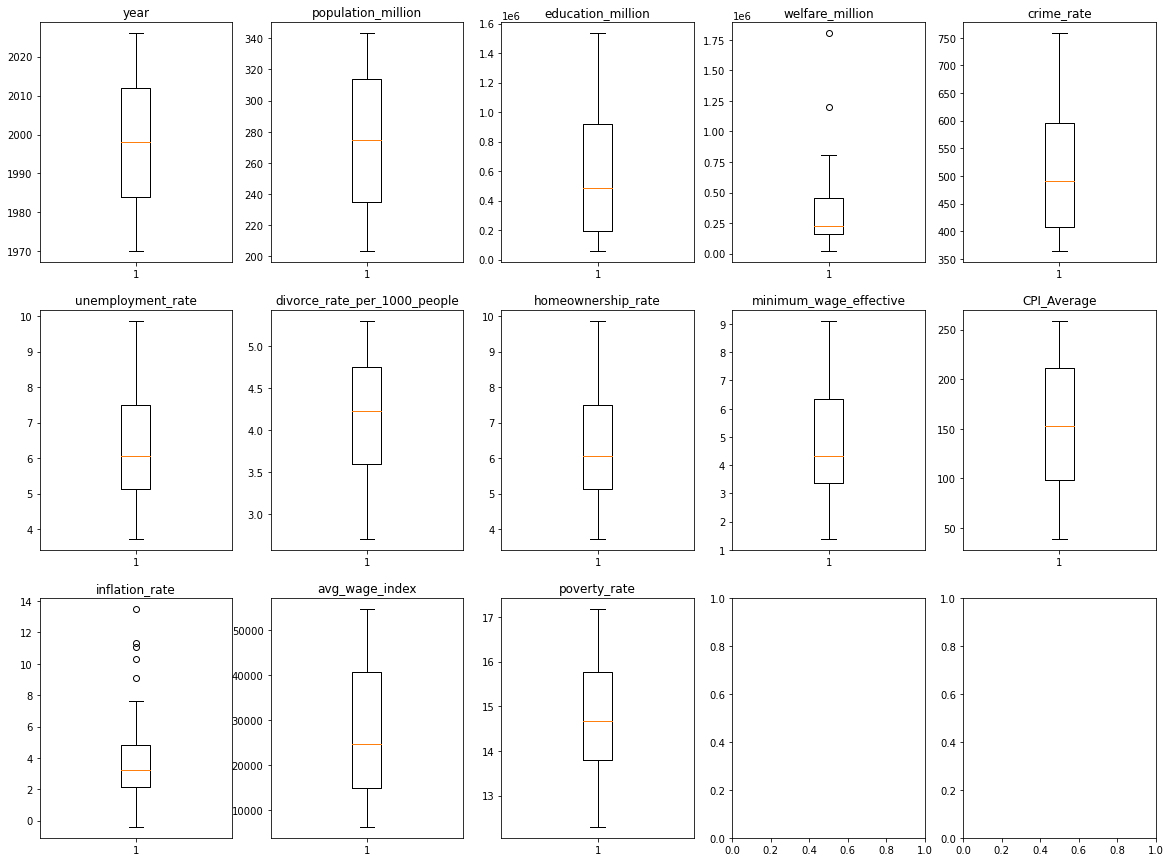

--------- Alabama---------


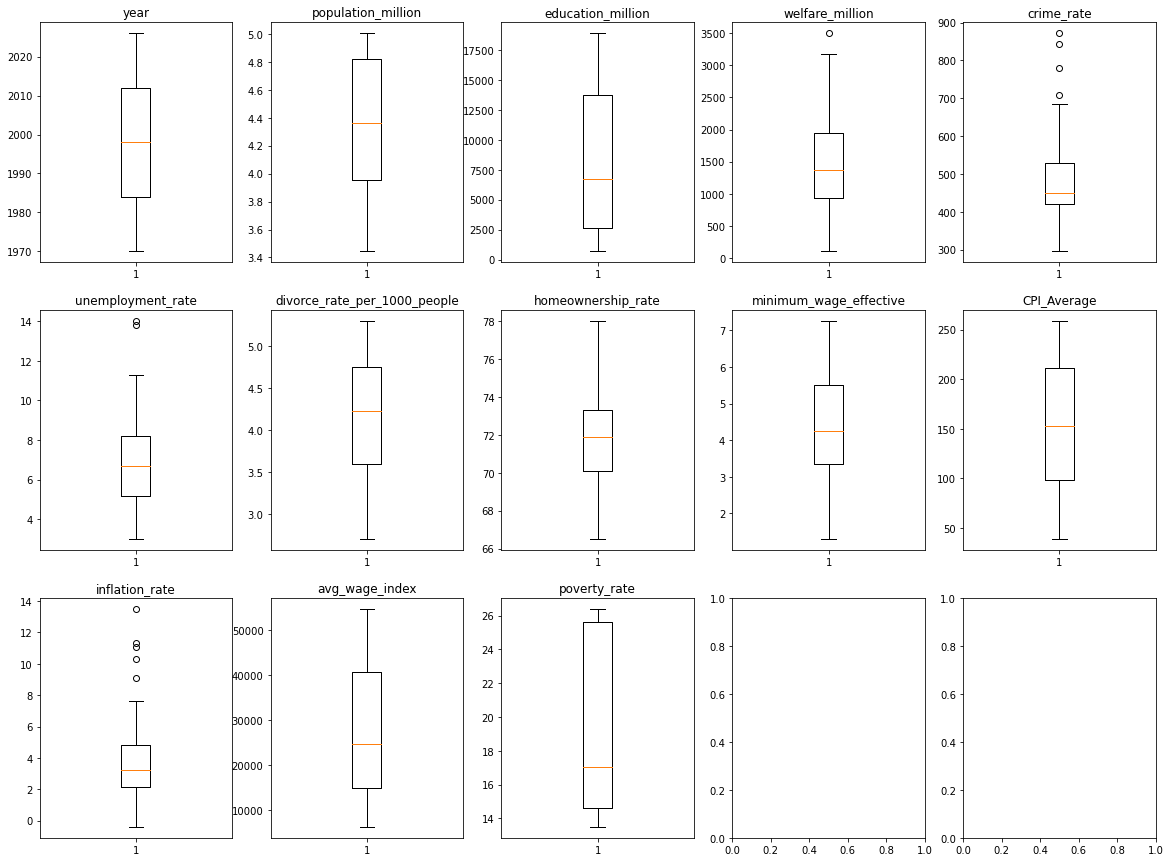

--------- Alaska---------


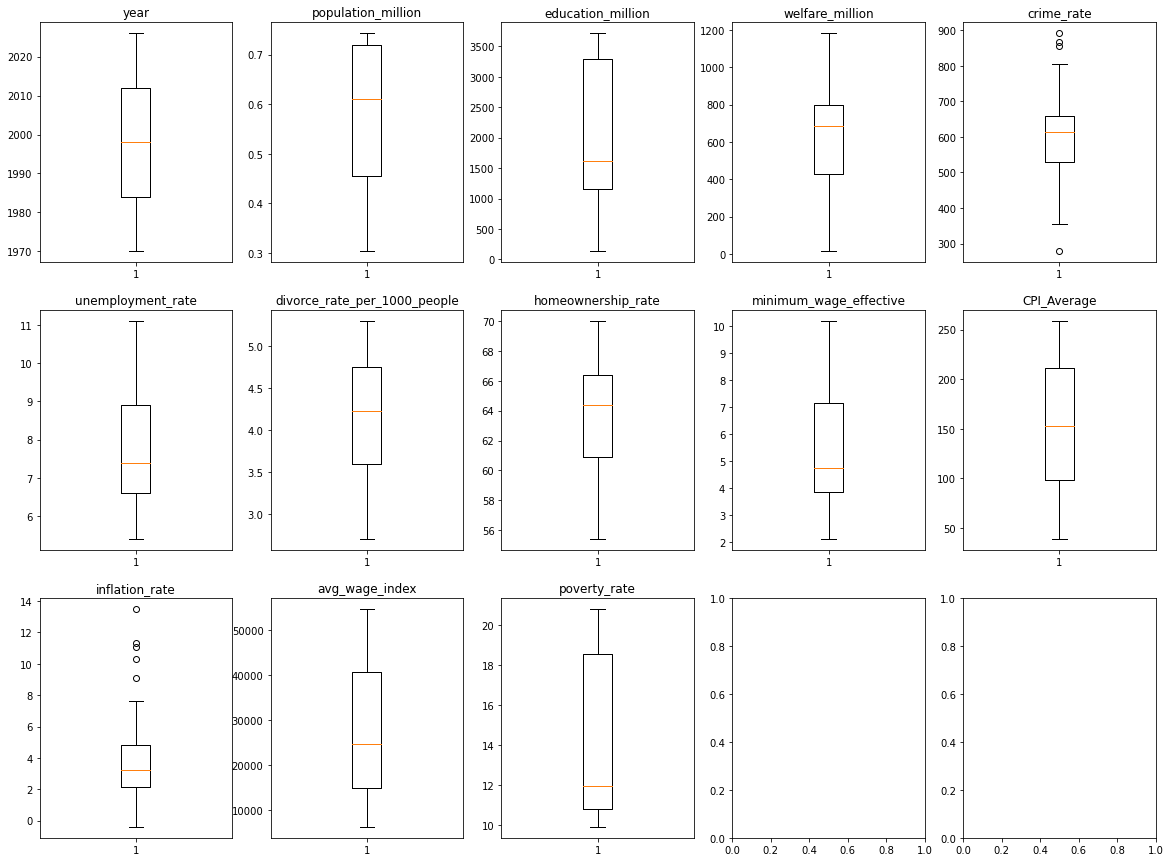

--------- Arizona---------


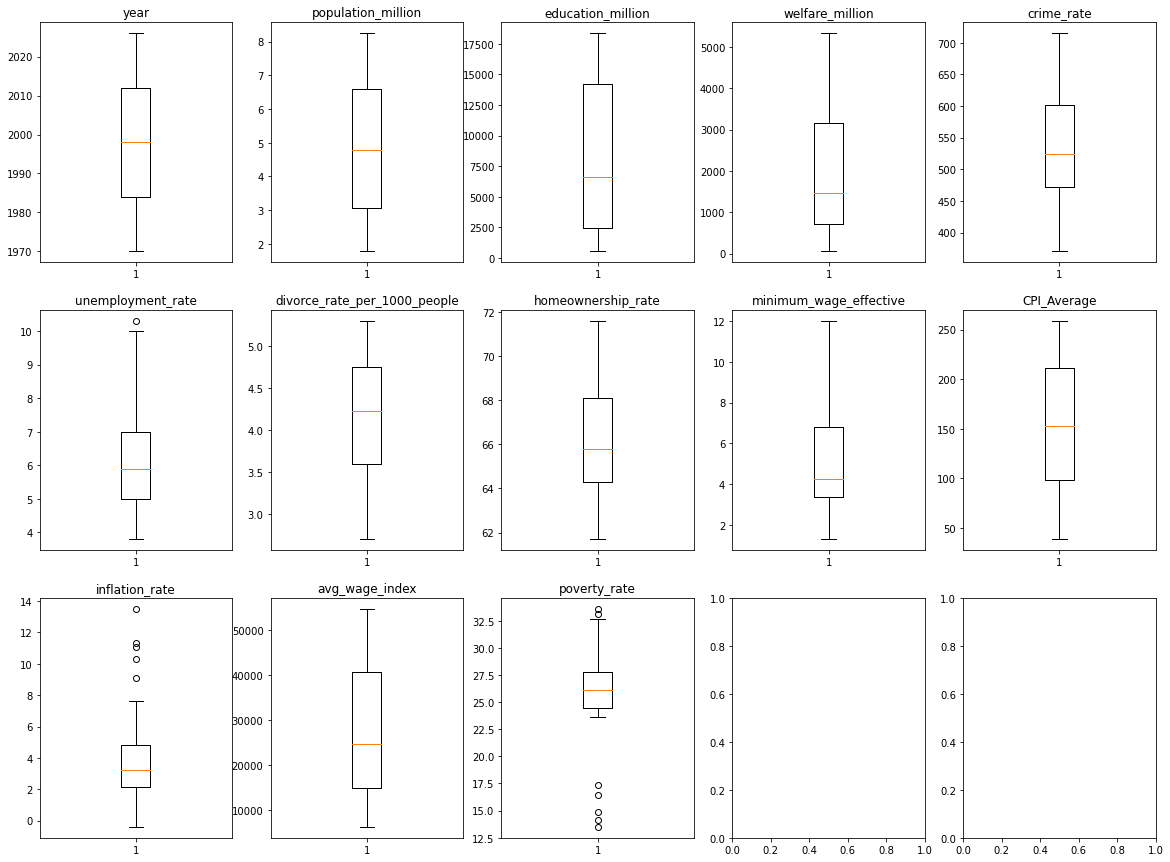

--------- Arkansas---------


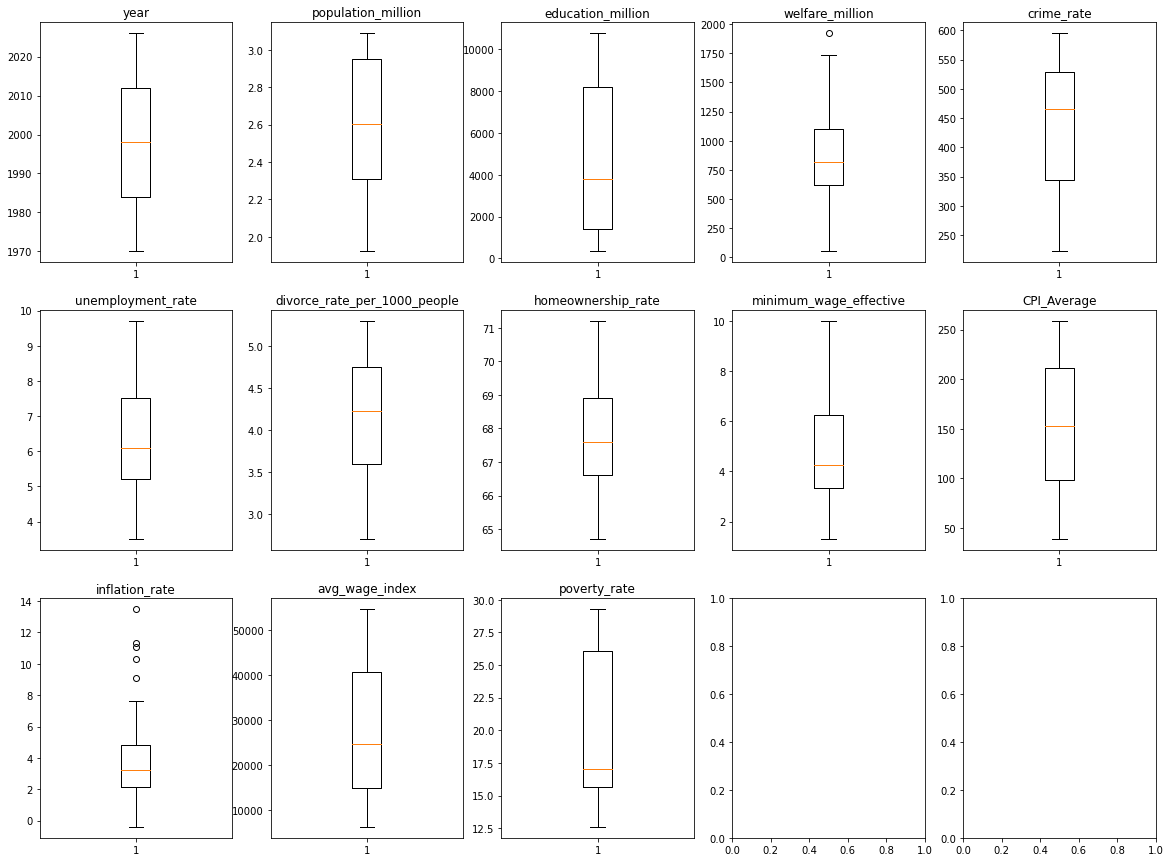

--------- California---------


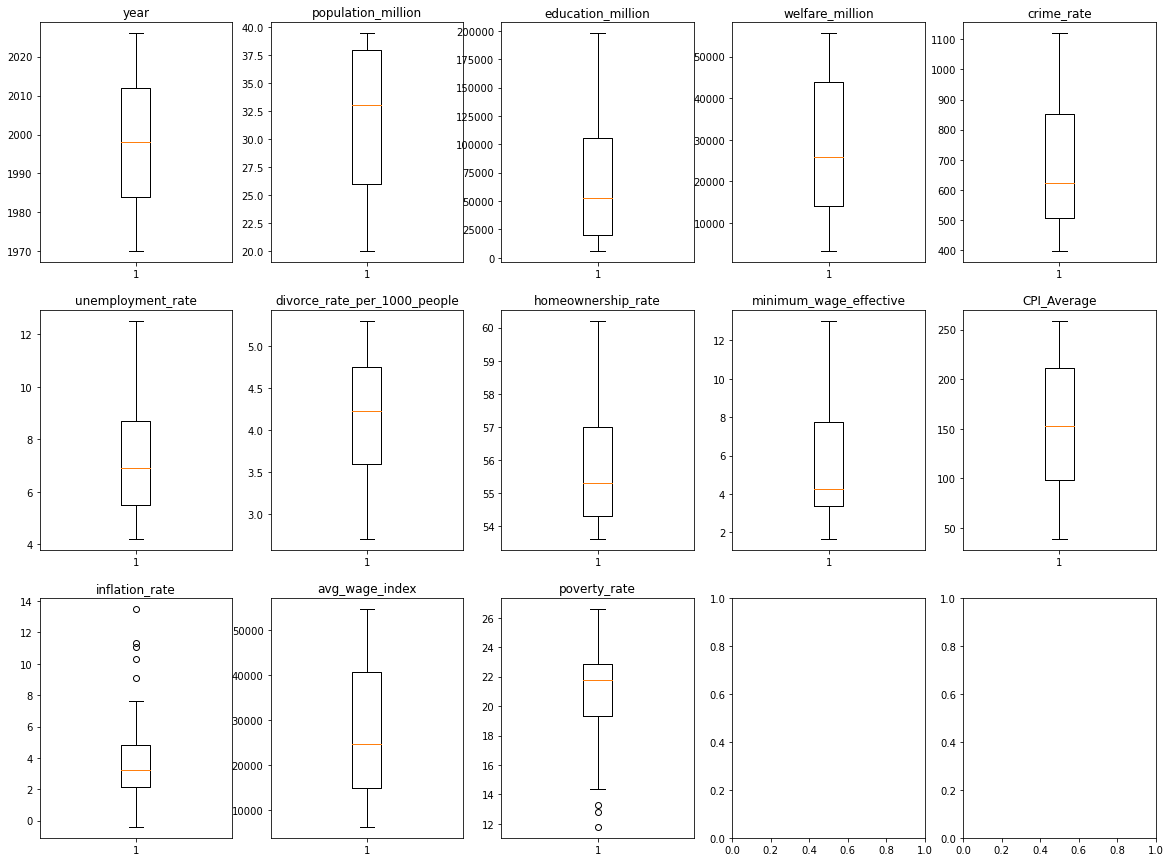

--------- Colorado---------


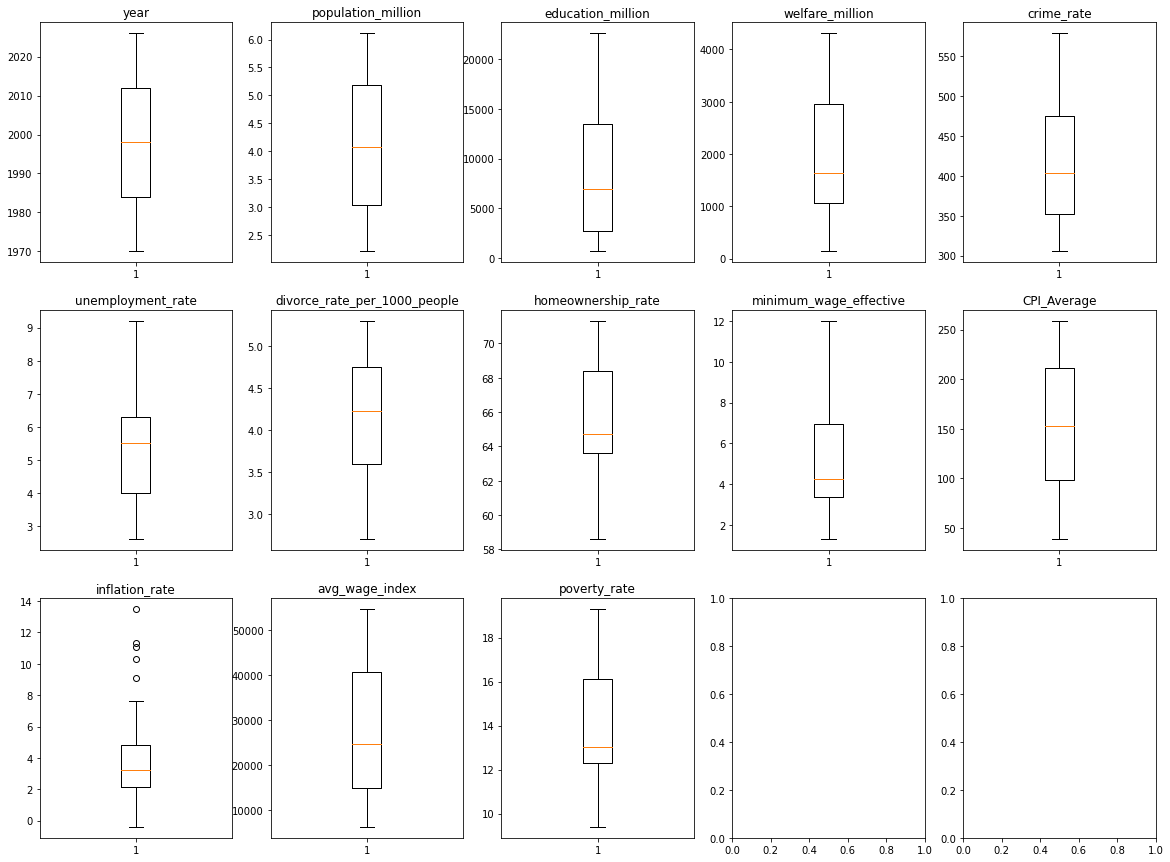

--------- Connecticut---------


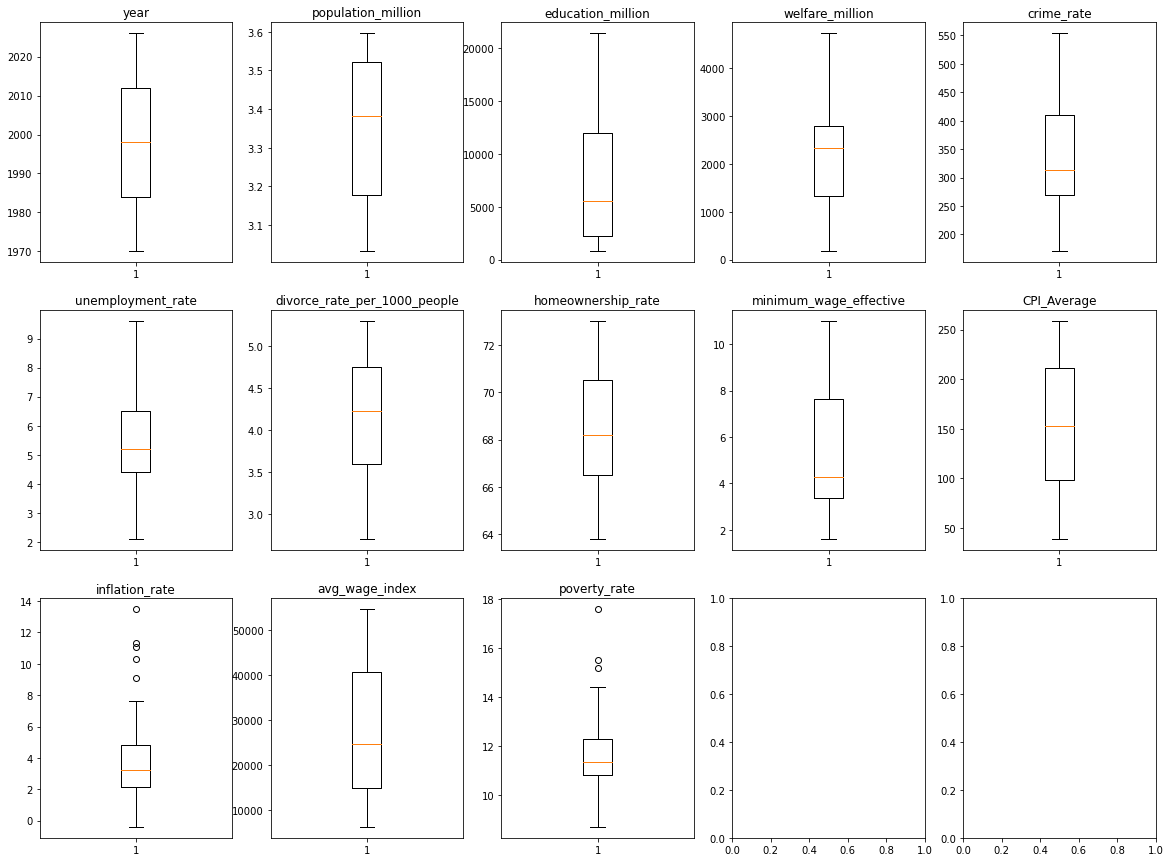

--------- Delaware---------


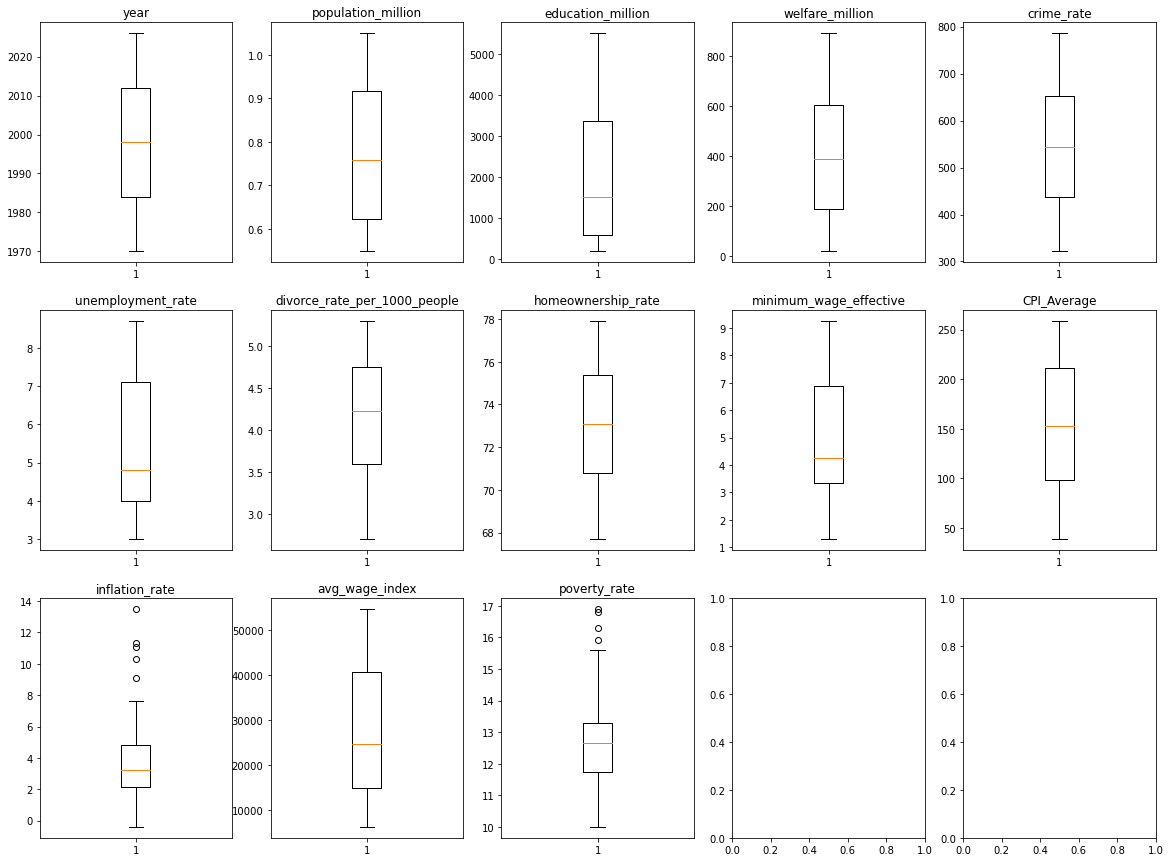

--------- District of Columbia---------


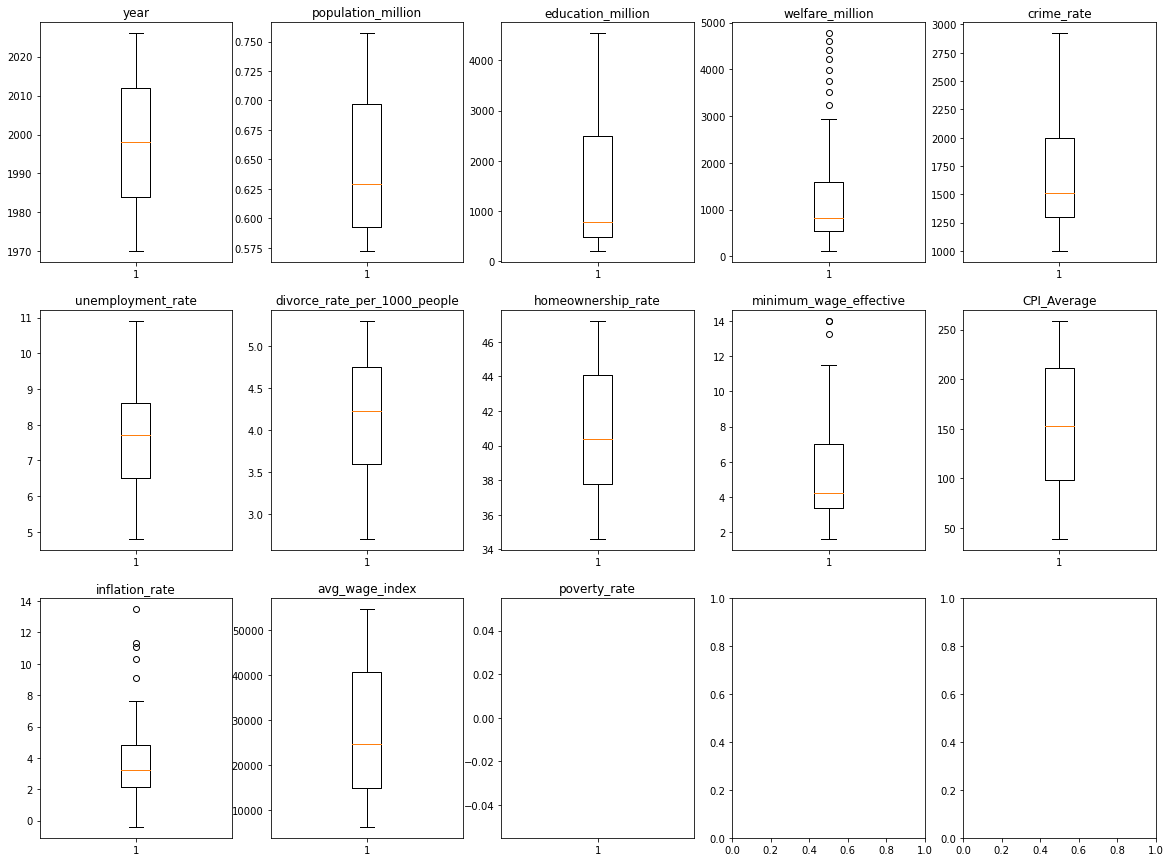

--------- Florida---------


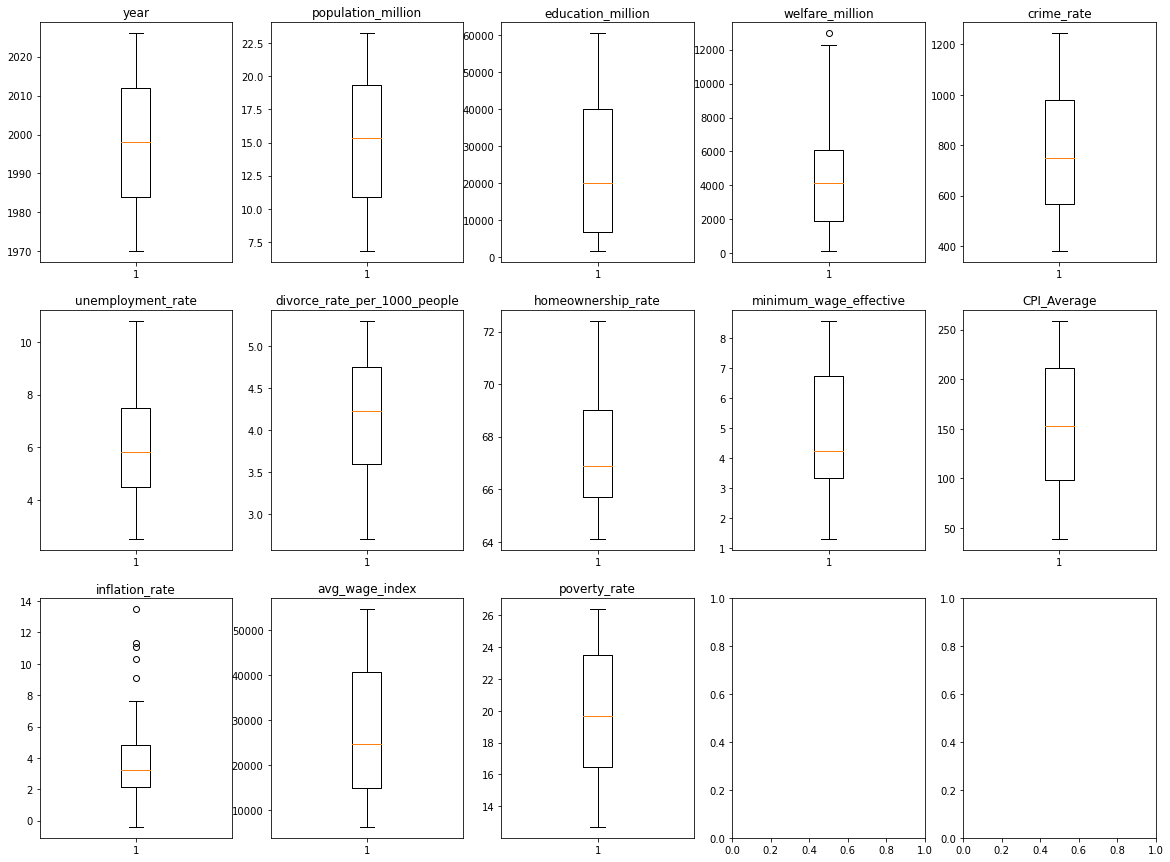

--------- Georgia---------


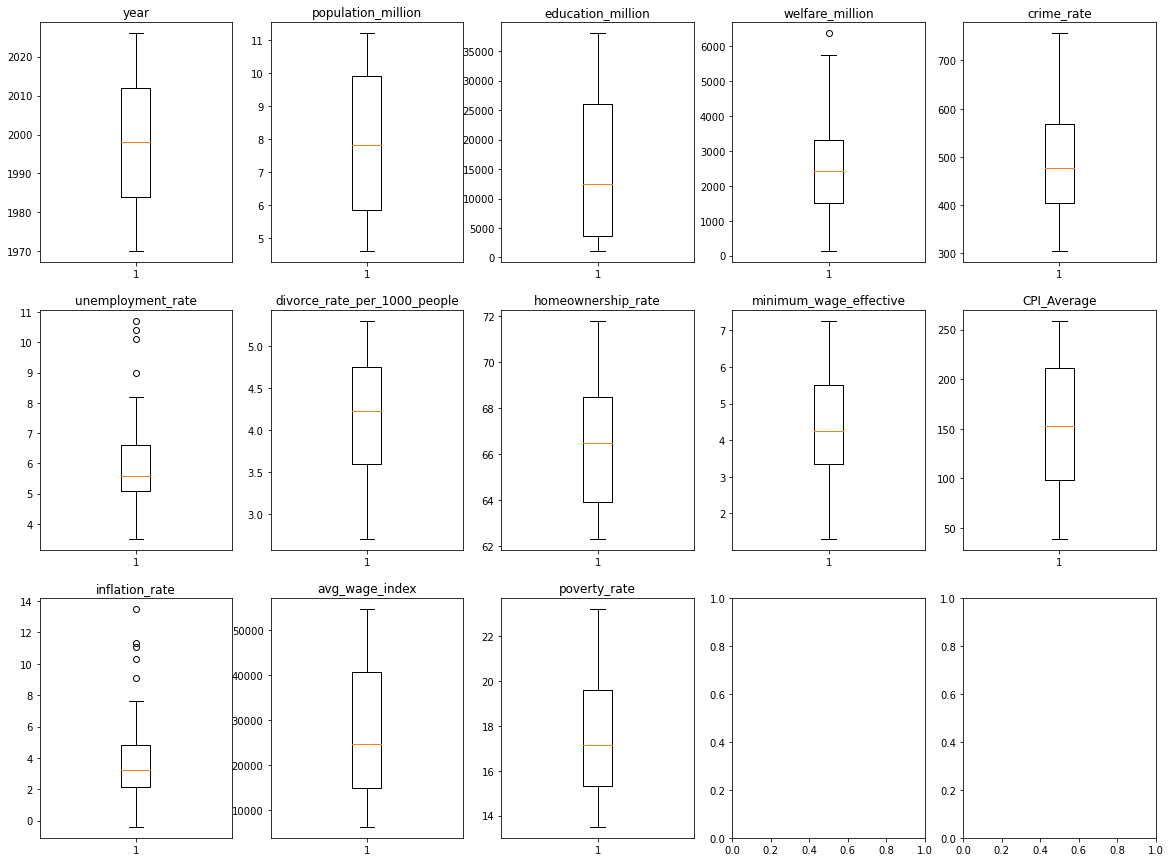

--------- Hawaii---------


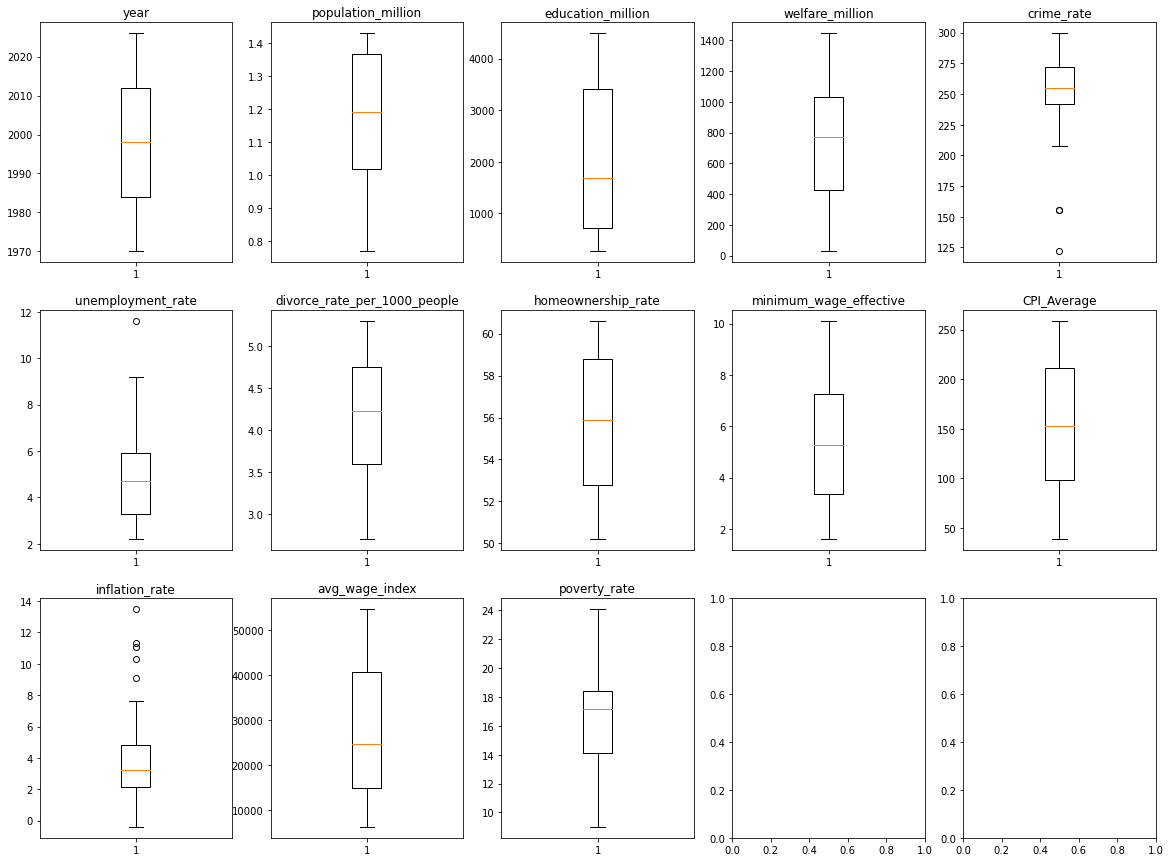

--------- Idaho---------


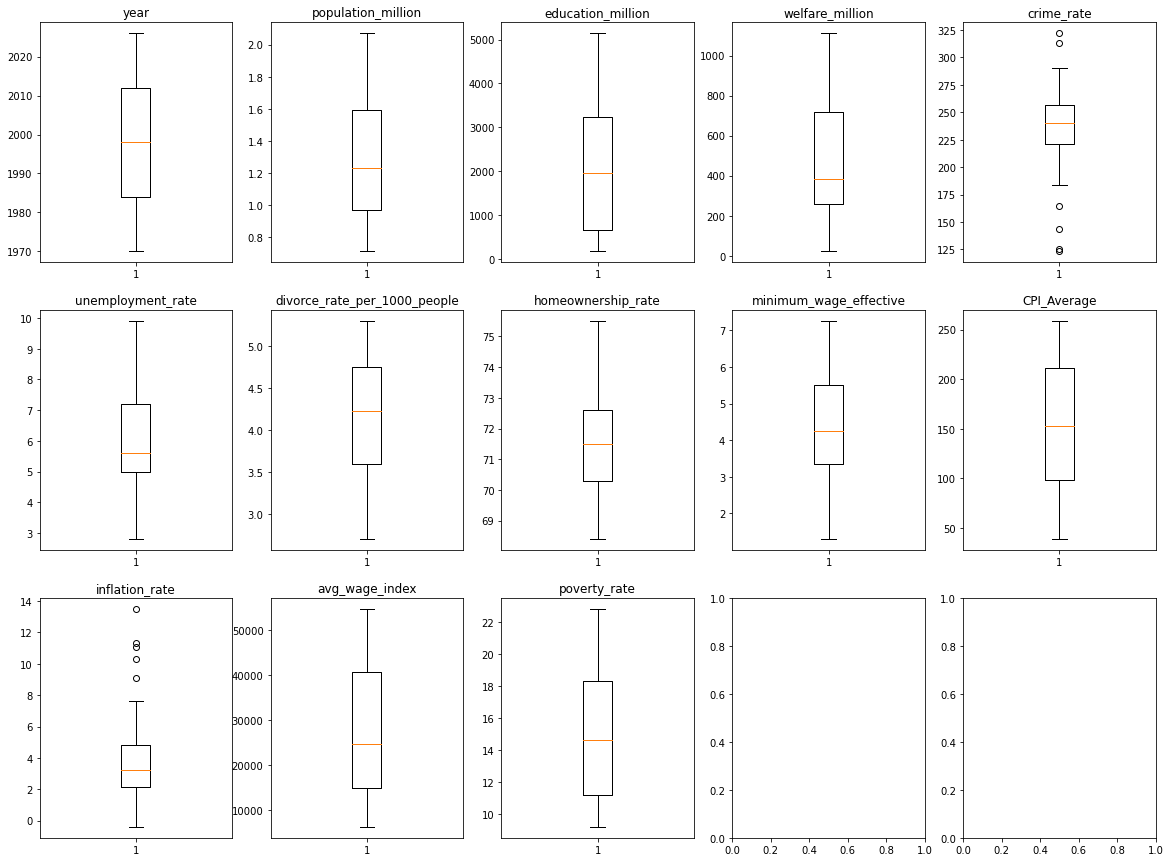

--------- Illinois---------


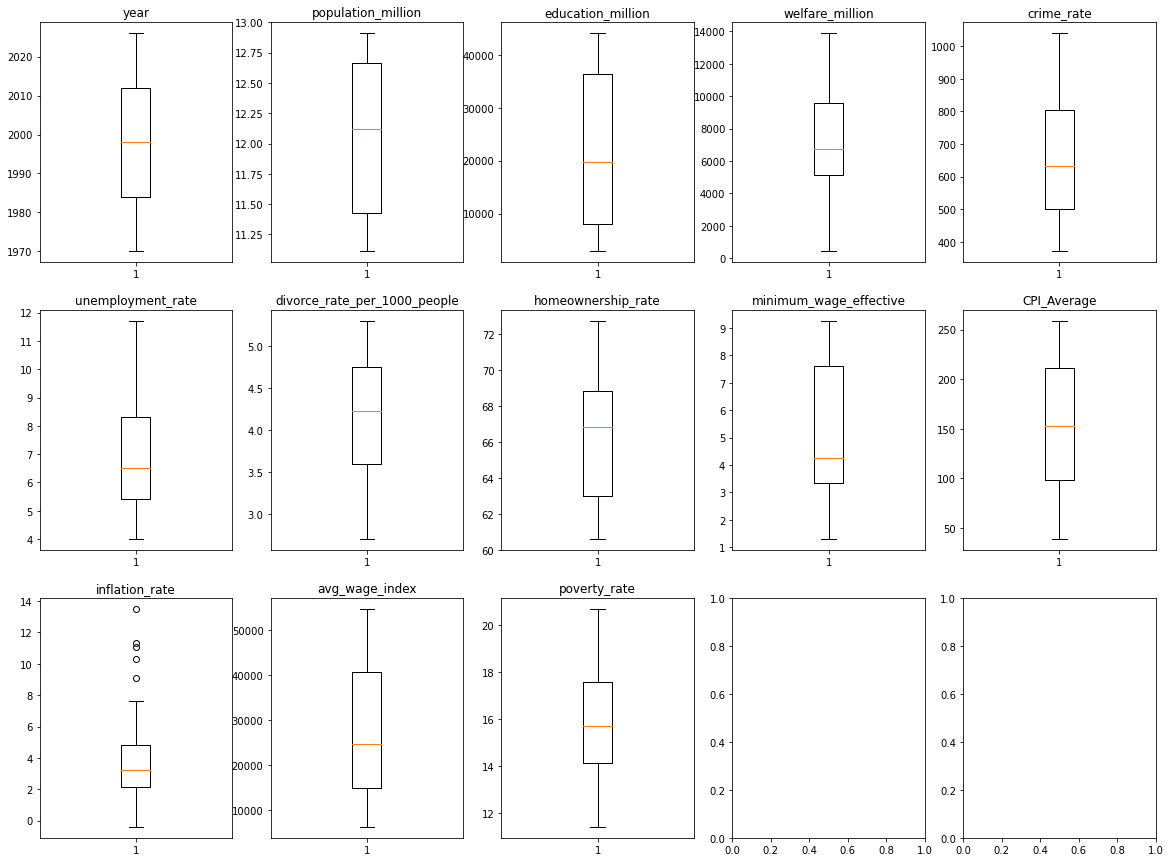

--------- Indiana---------


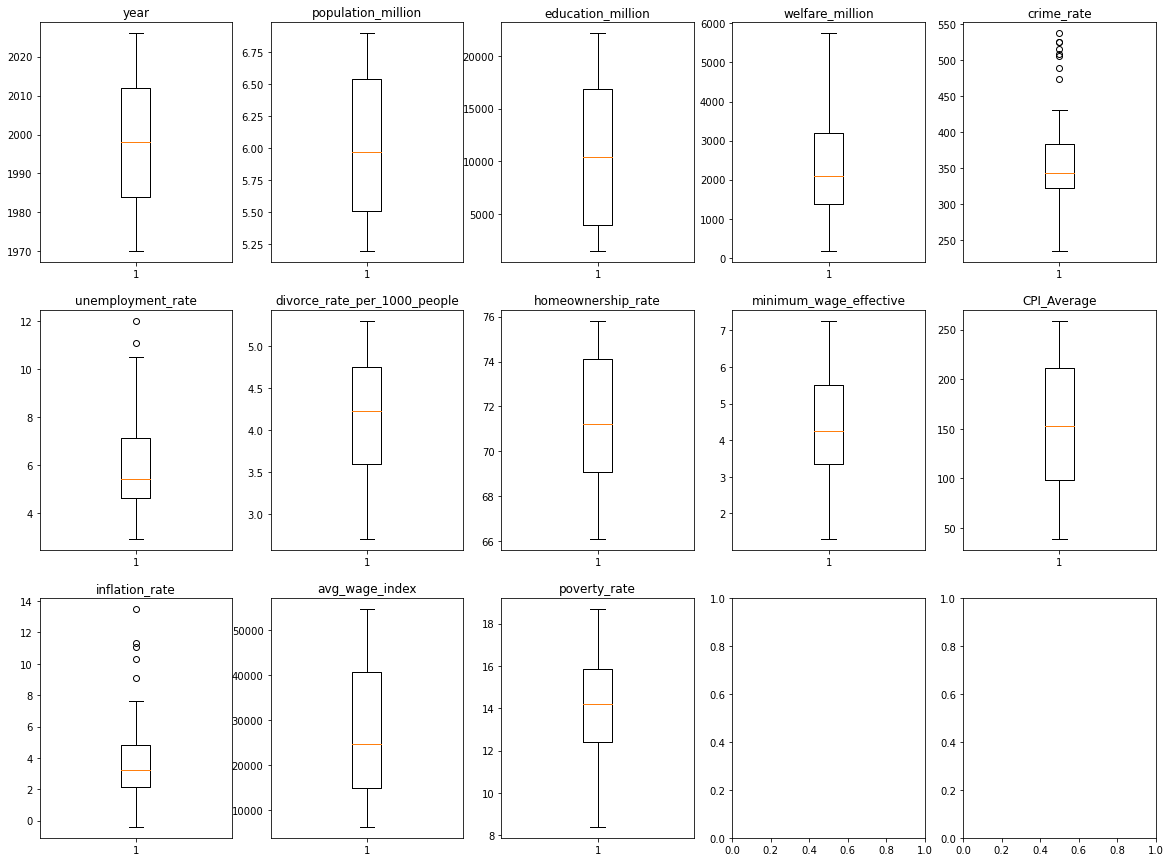

--------- Iowa---------


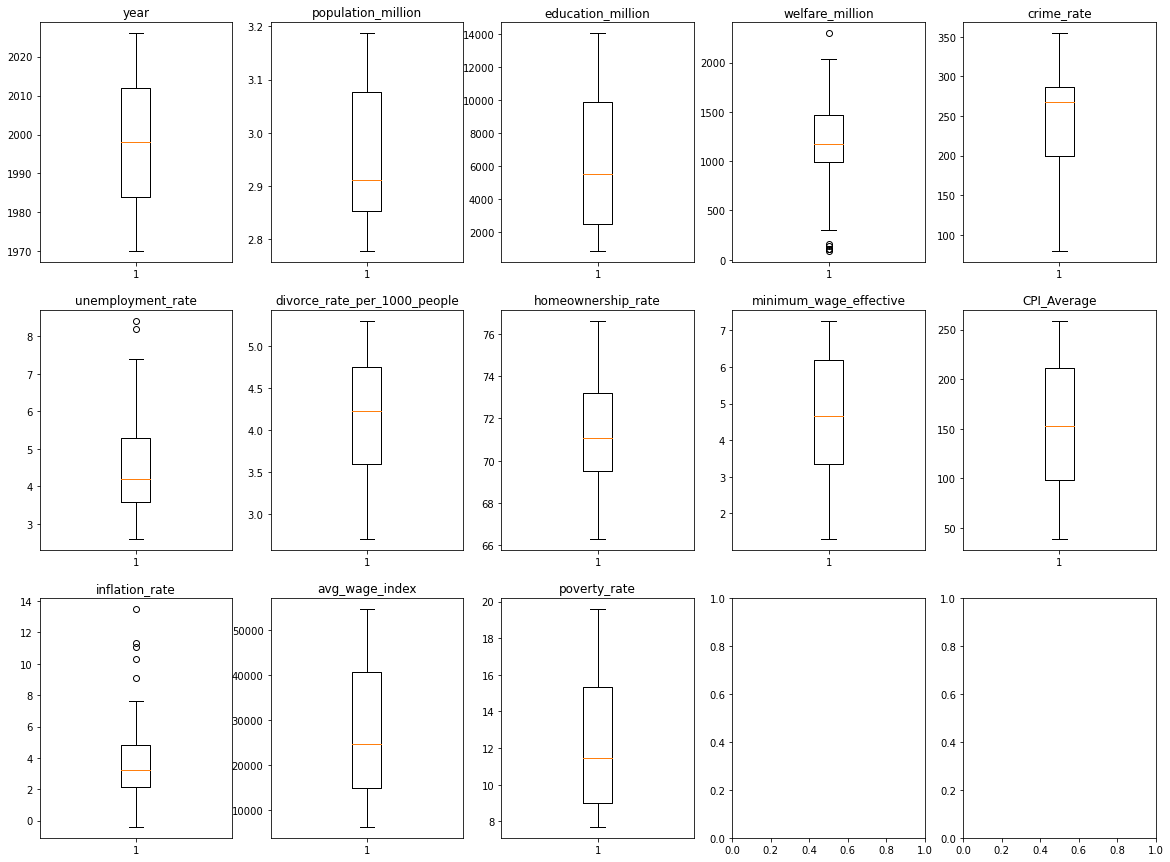

--------- Kansas---------


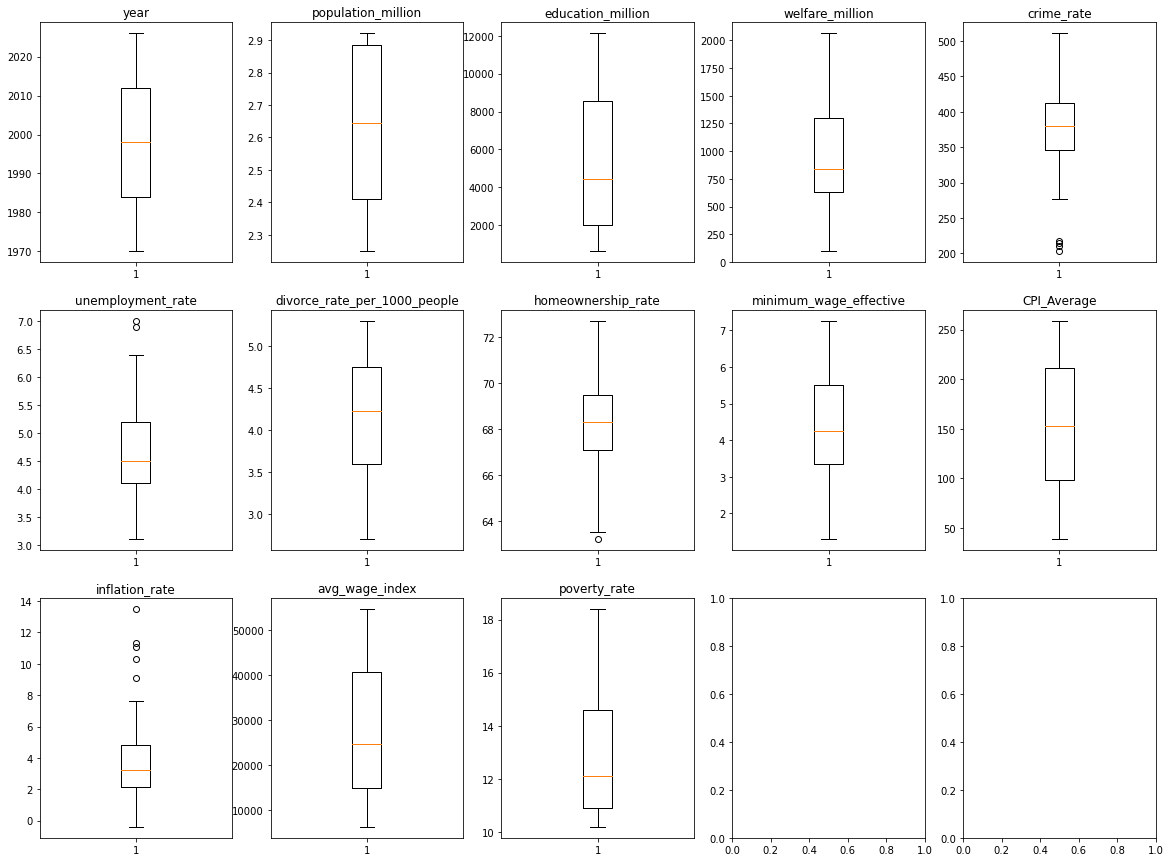

--------- Kentucky---------


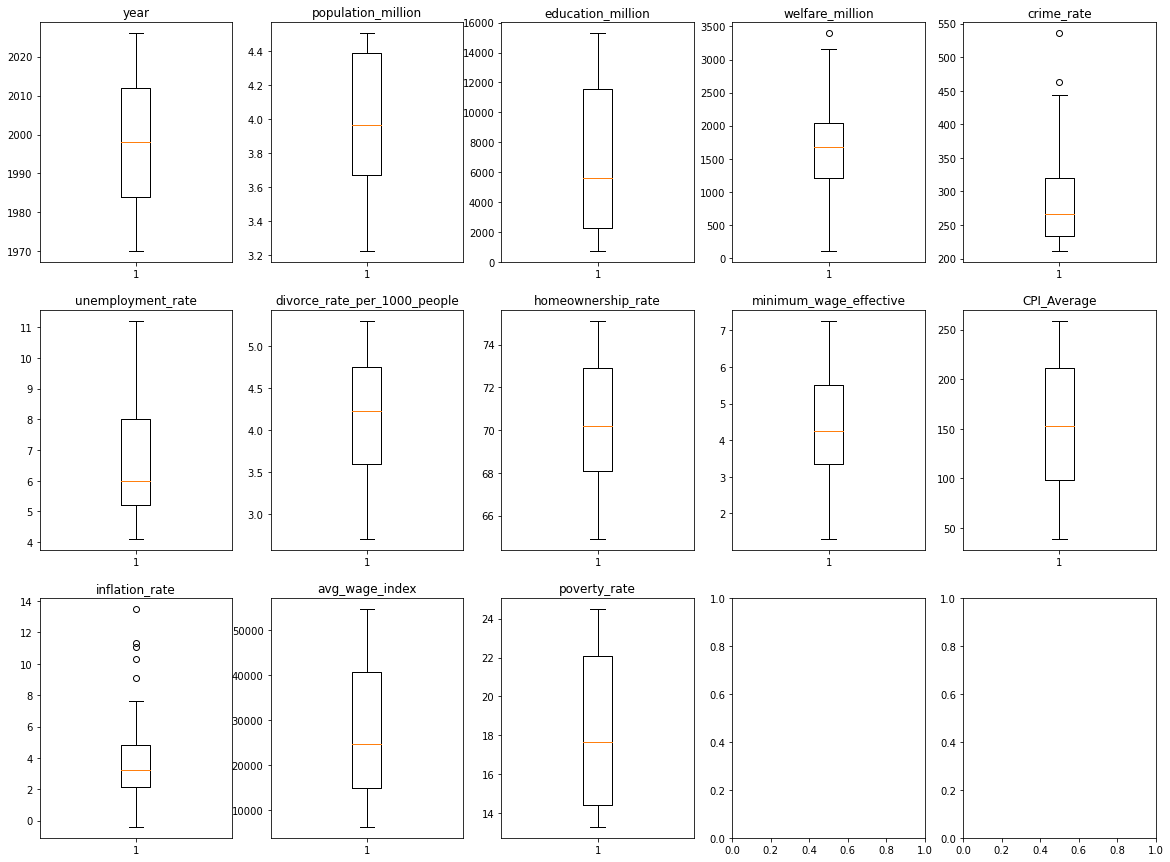

--------- Louisiana---------


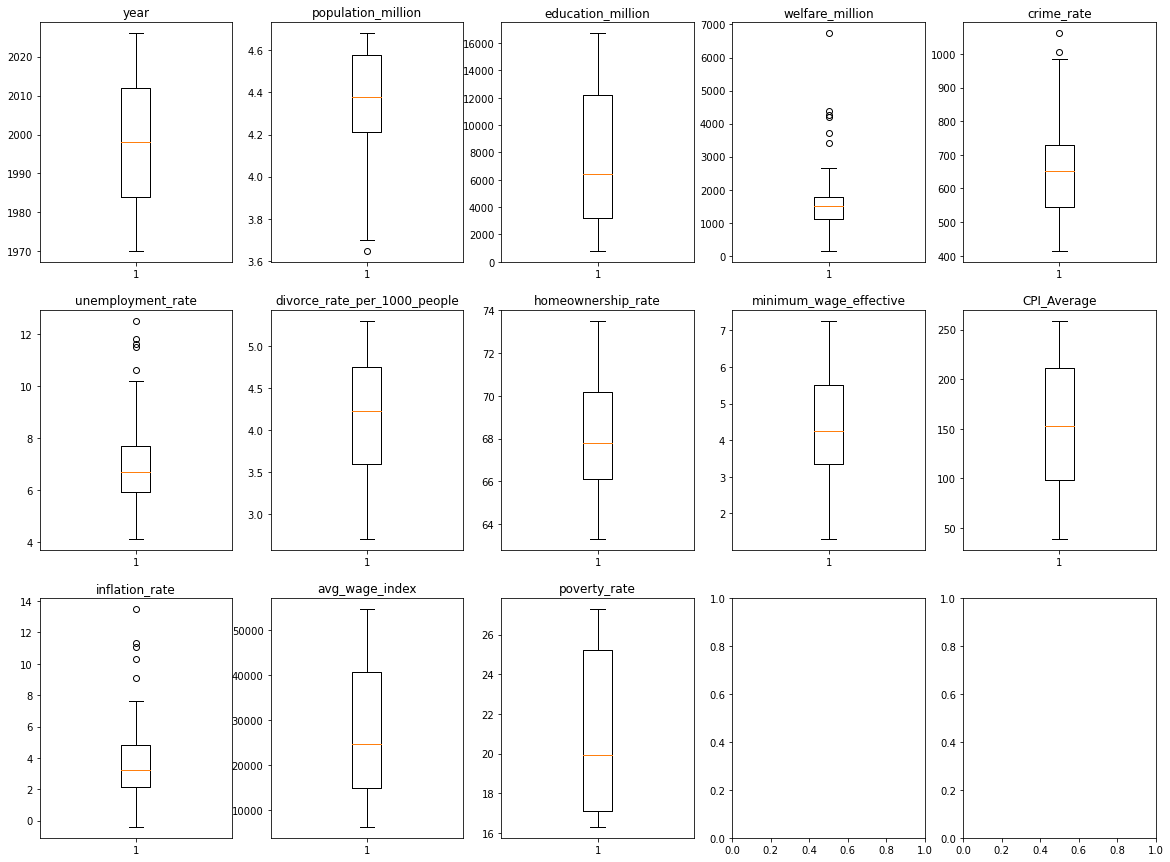

--------- Maine---------


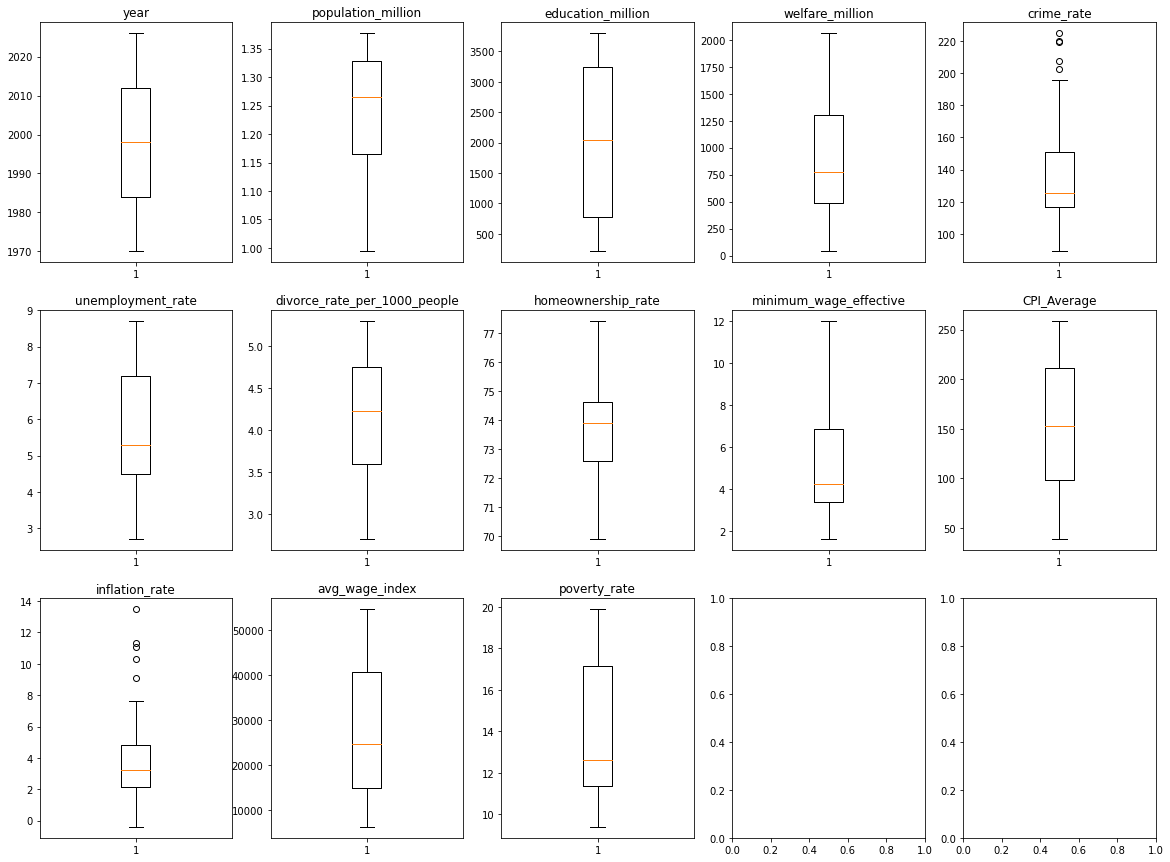

--------- Maryland---------


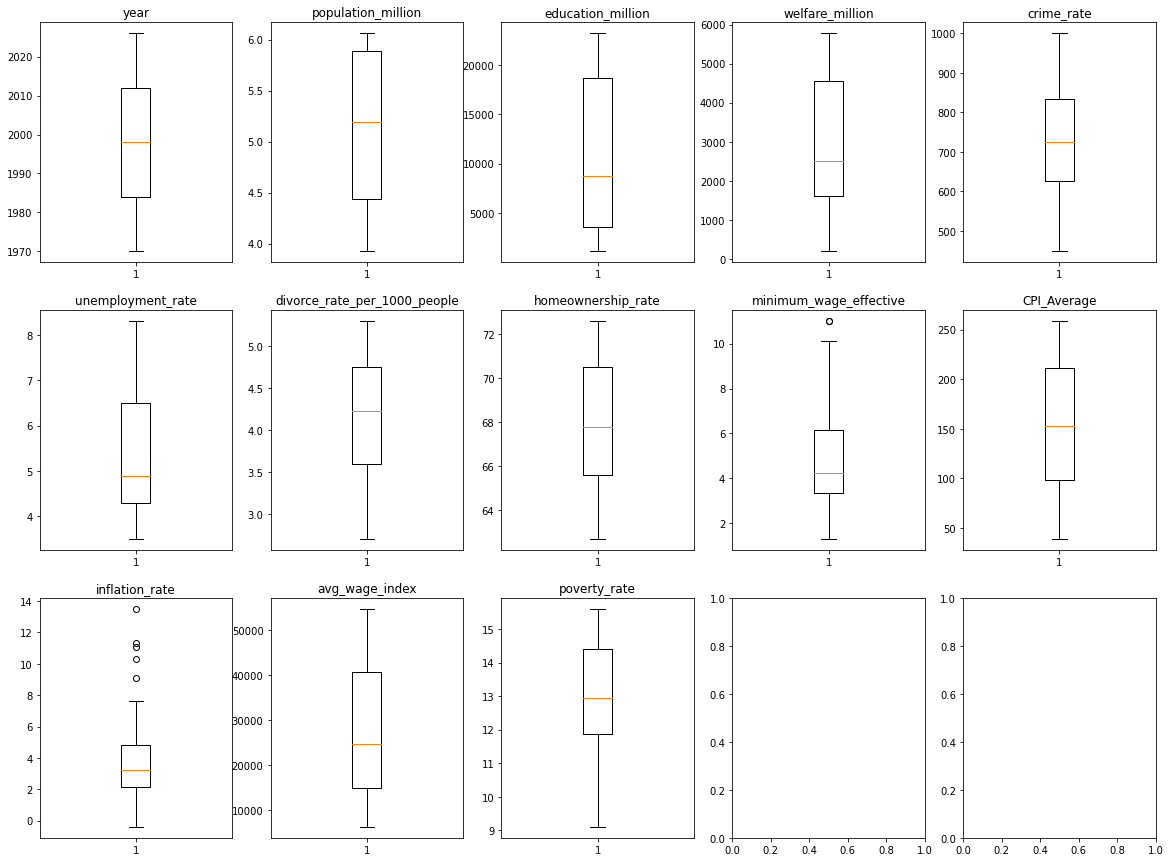

--------- Massachusetts---------


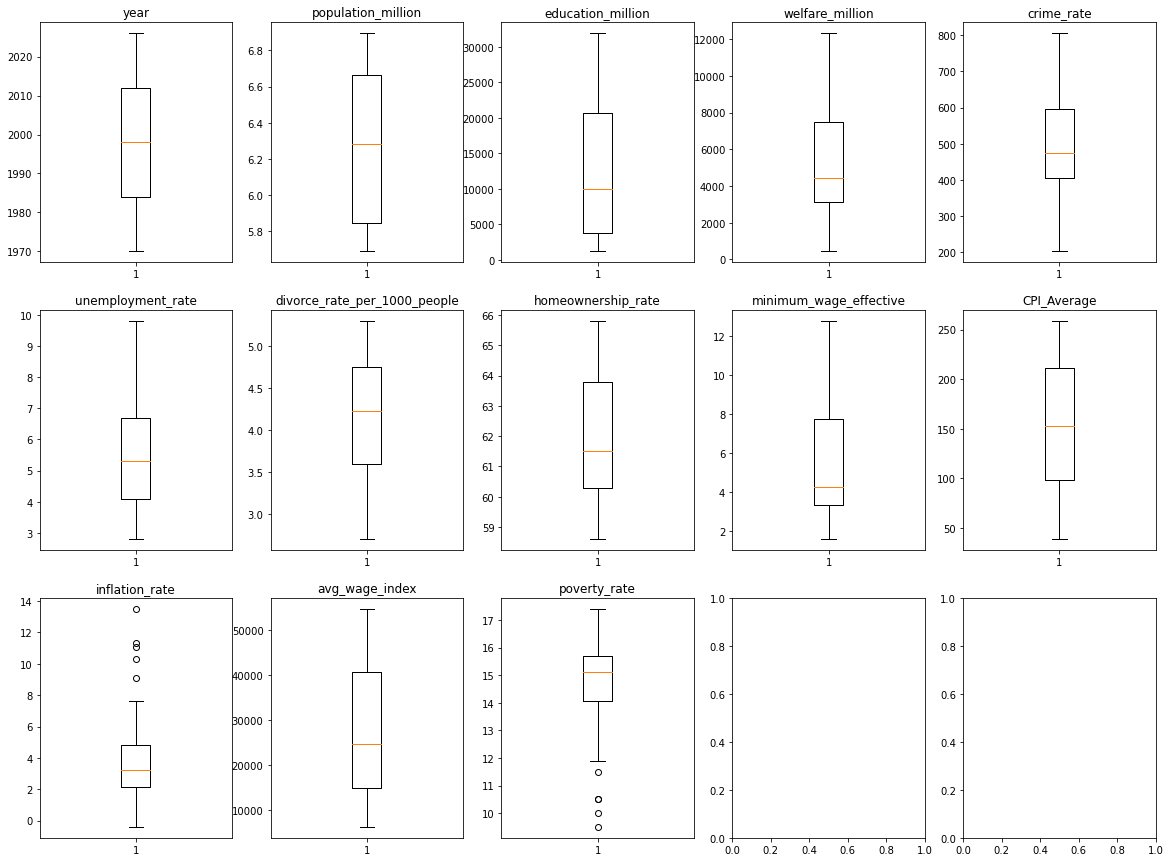

--------- Michigan---------


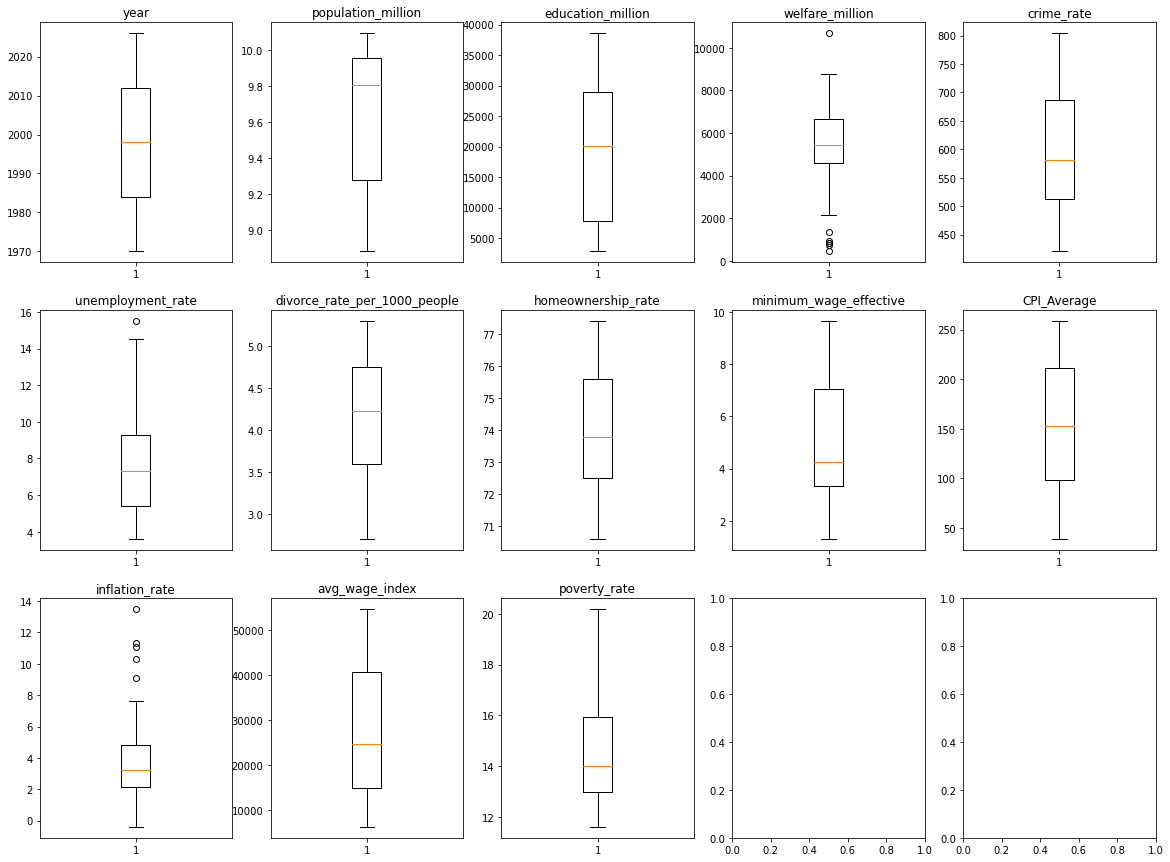

--------- Minnesota---------


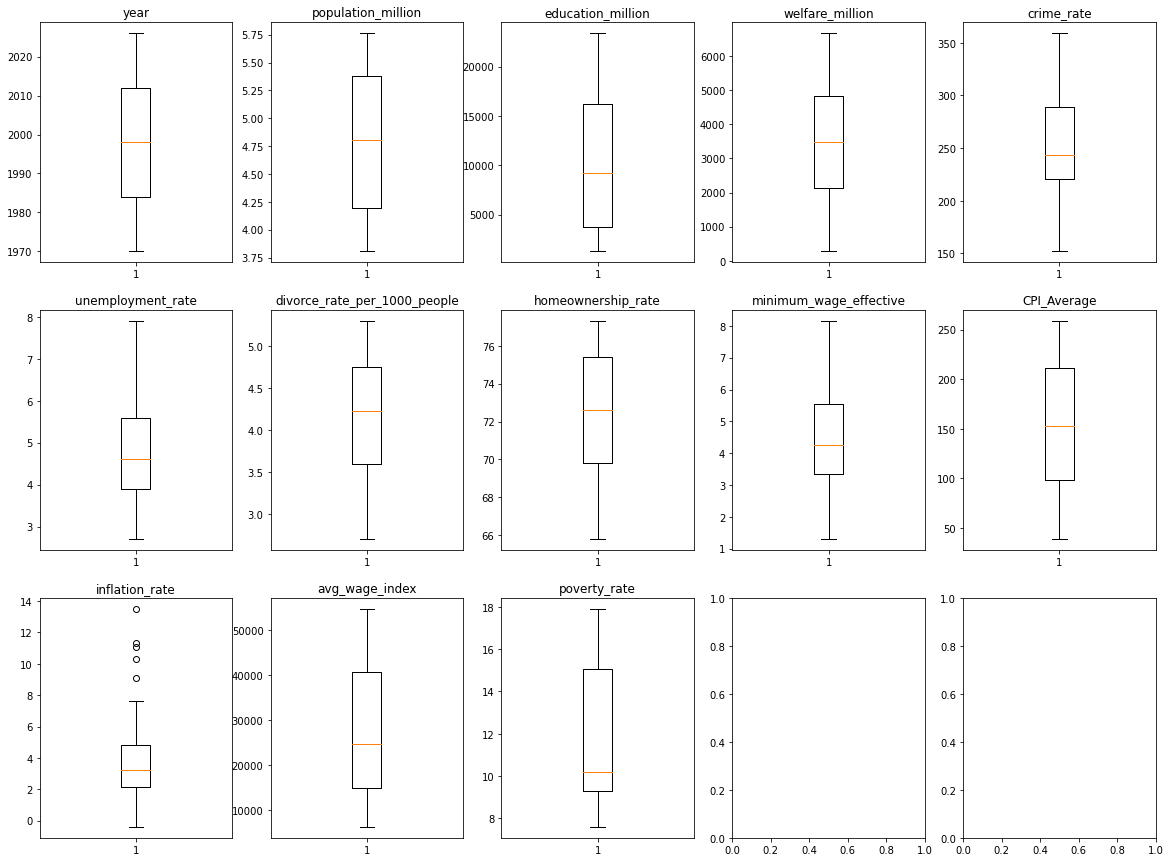

--------- Mississippi---------


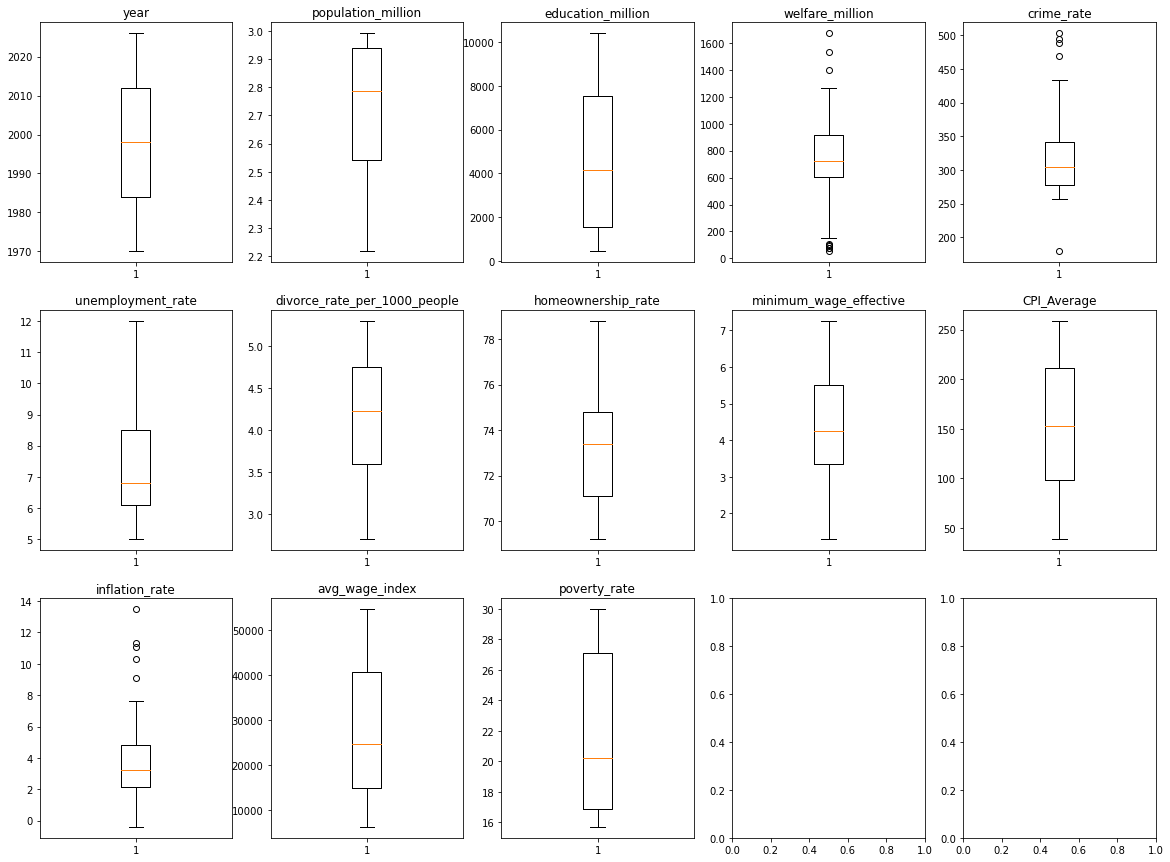

--------- Missouri---------


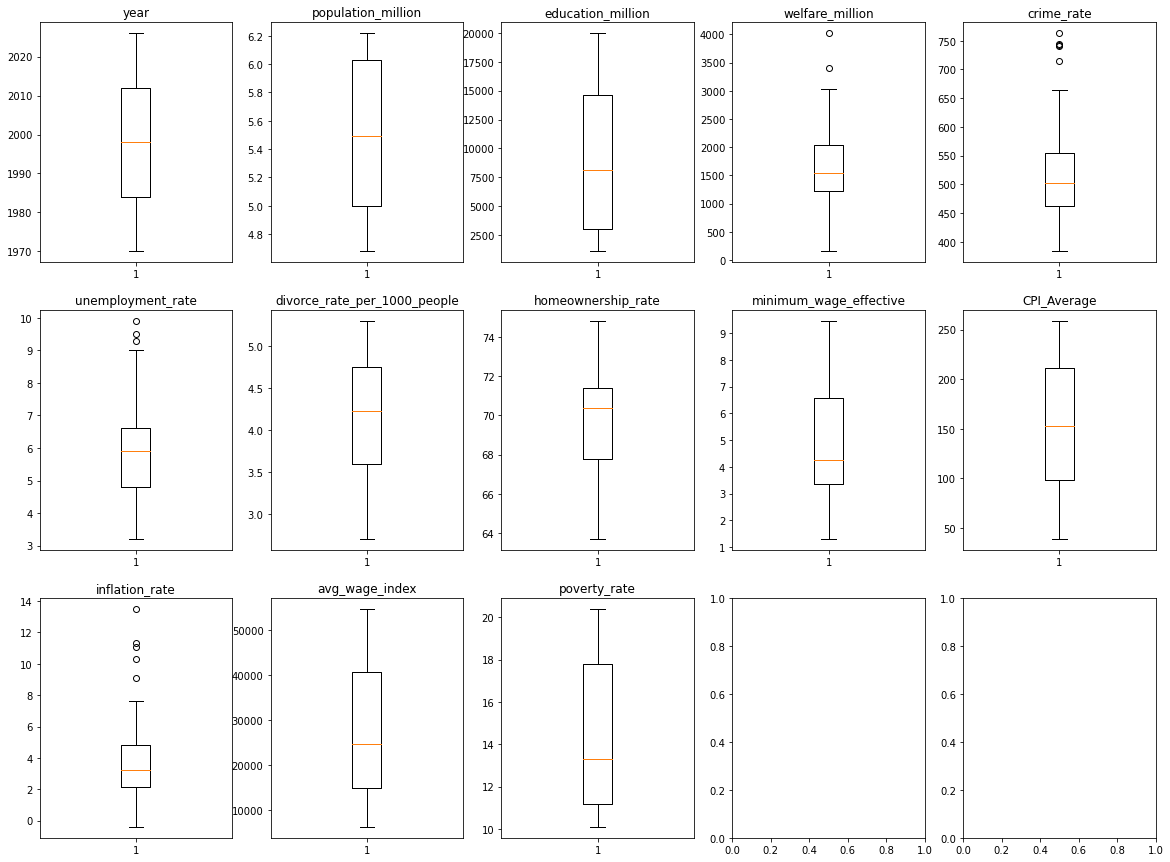

--------- Montana---------


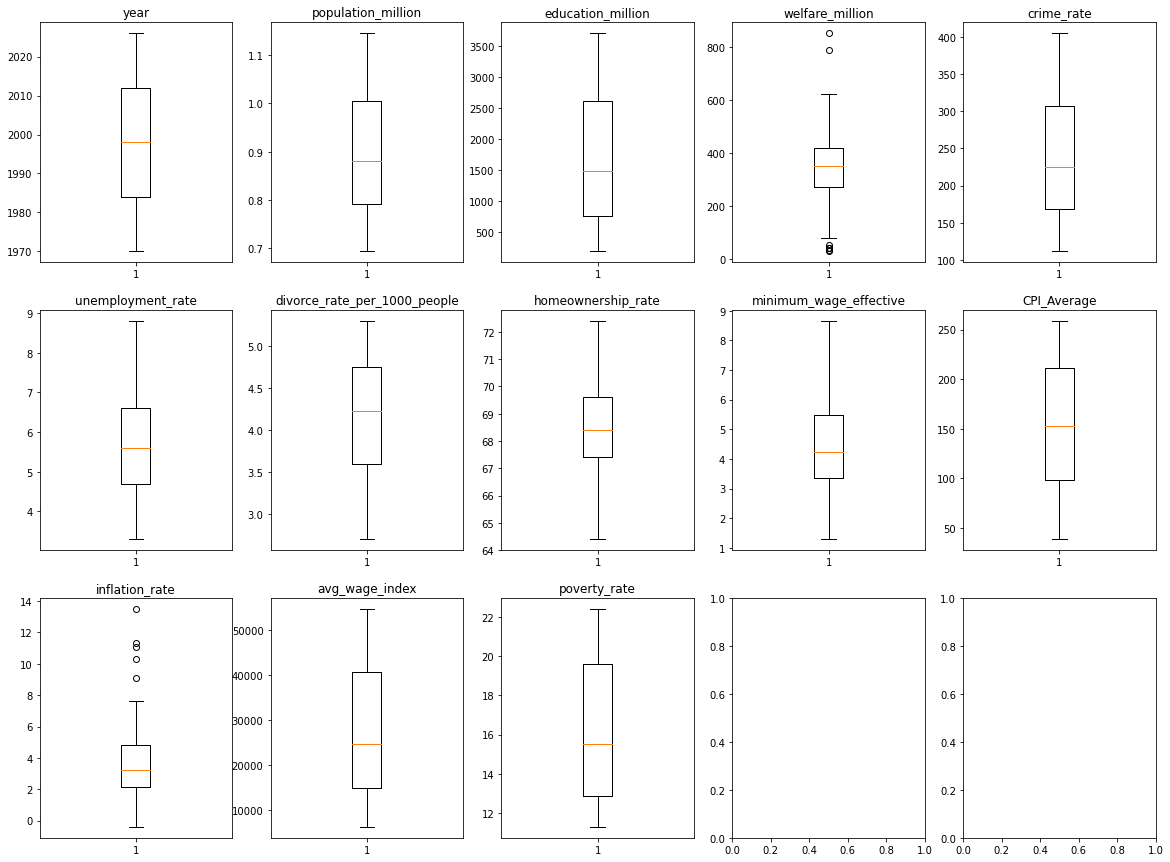

--------- Nebraska---------


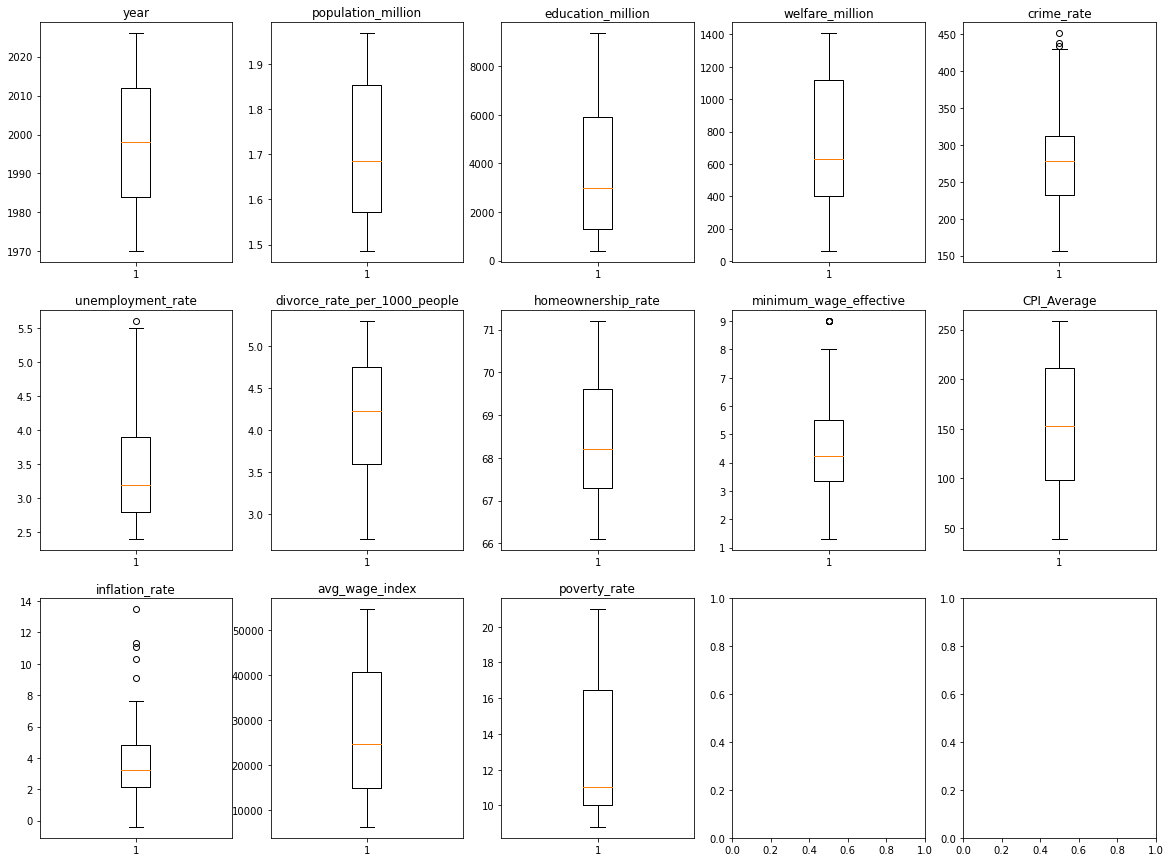

--------- Nevada---------


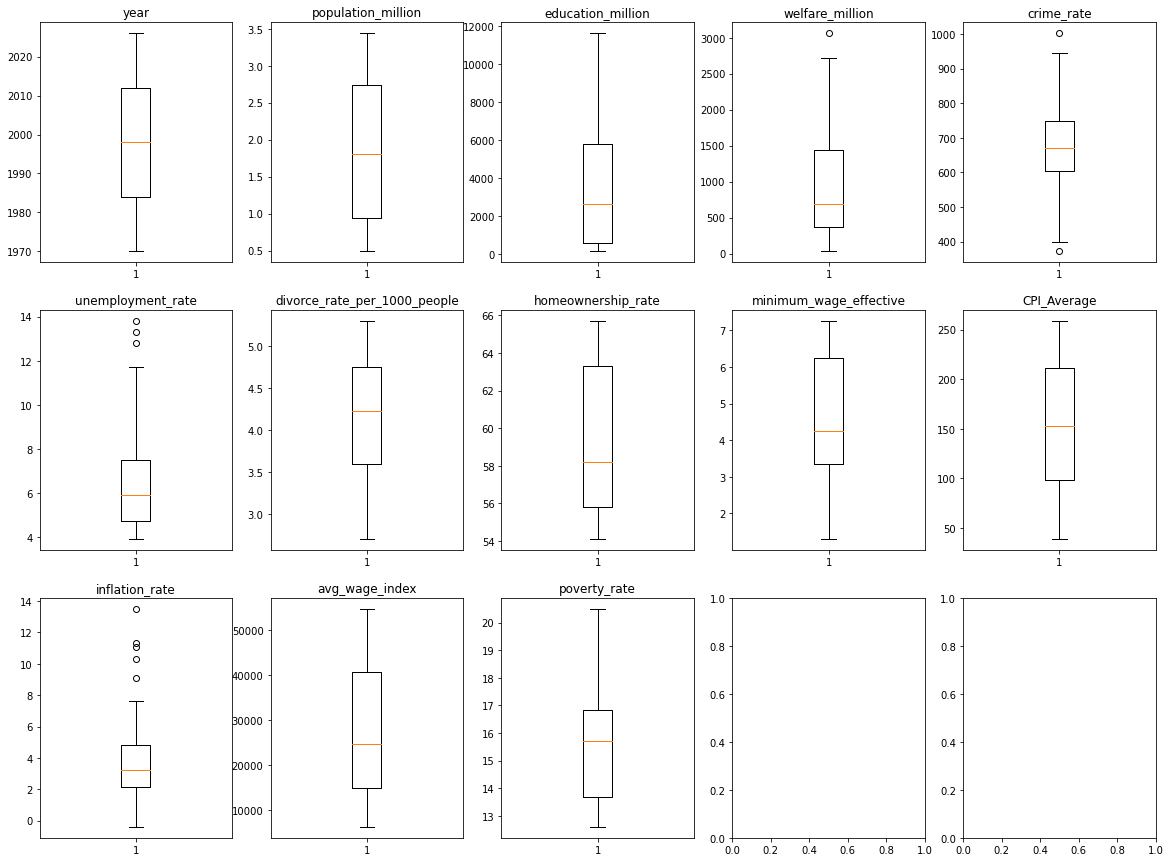

--------- New Hampshire---------


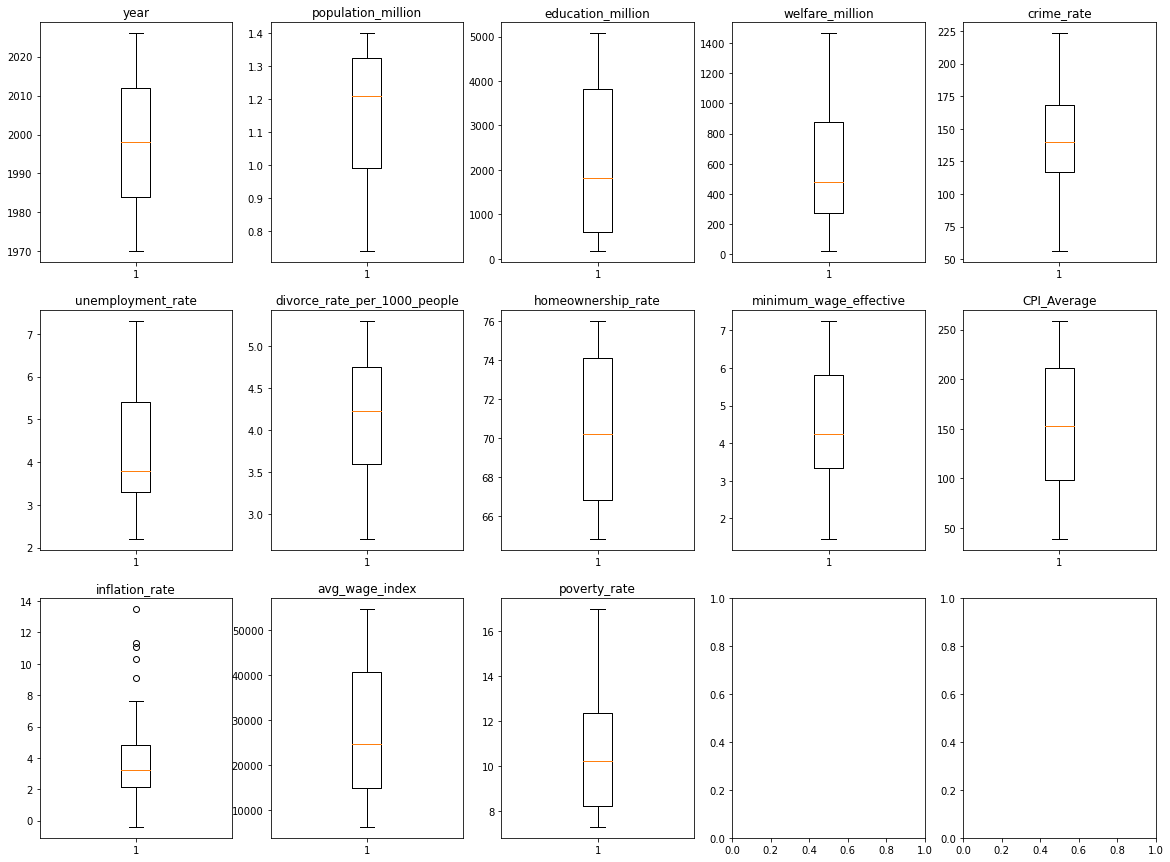

--------- New Jersey---------


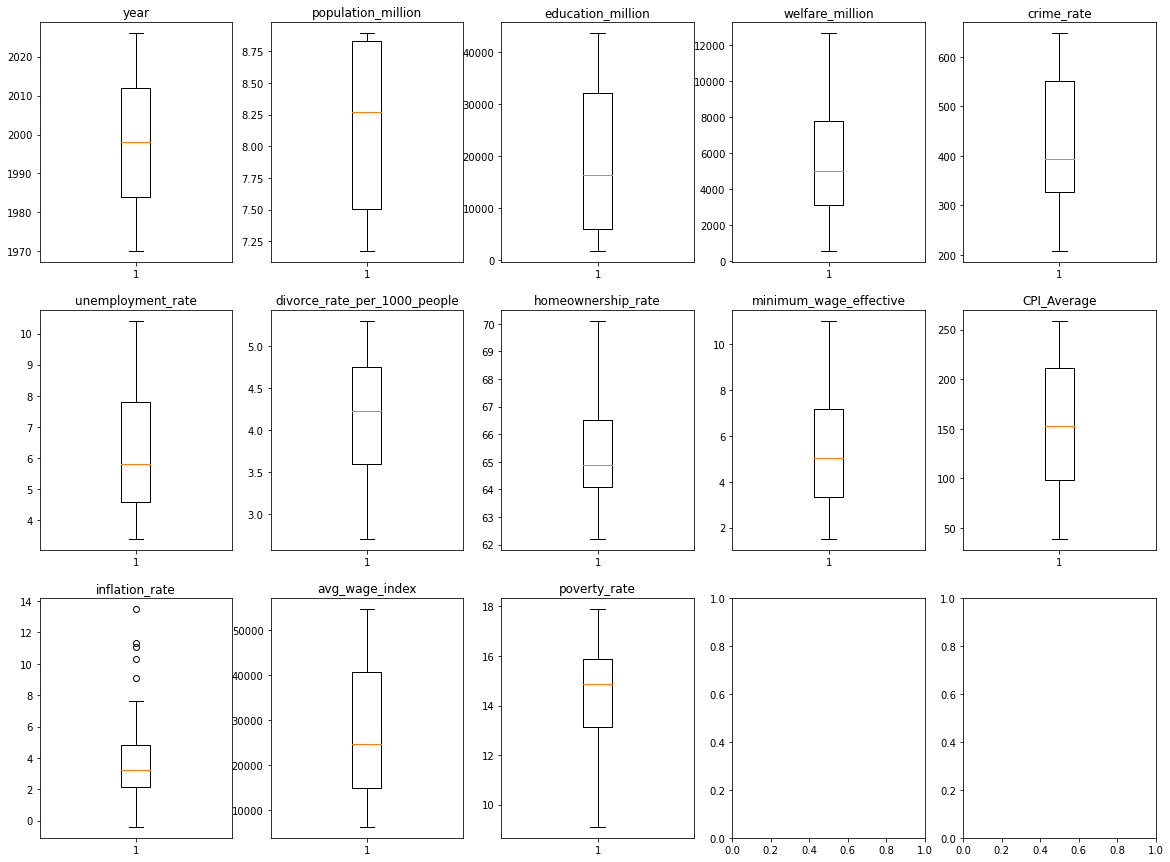

--------- New Mexico---------


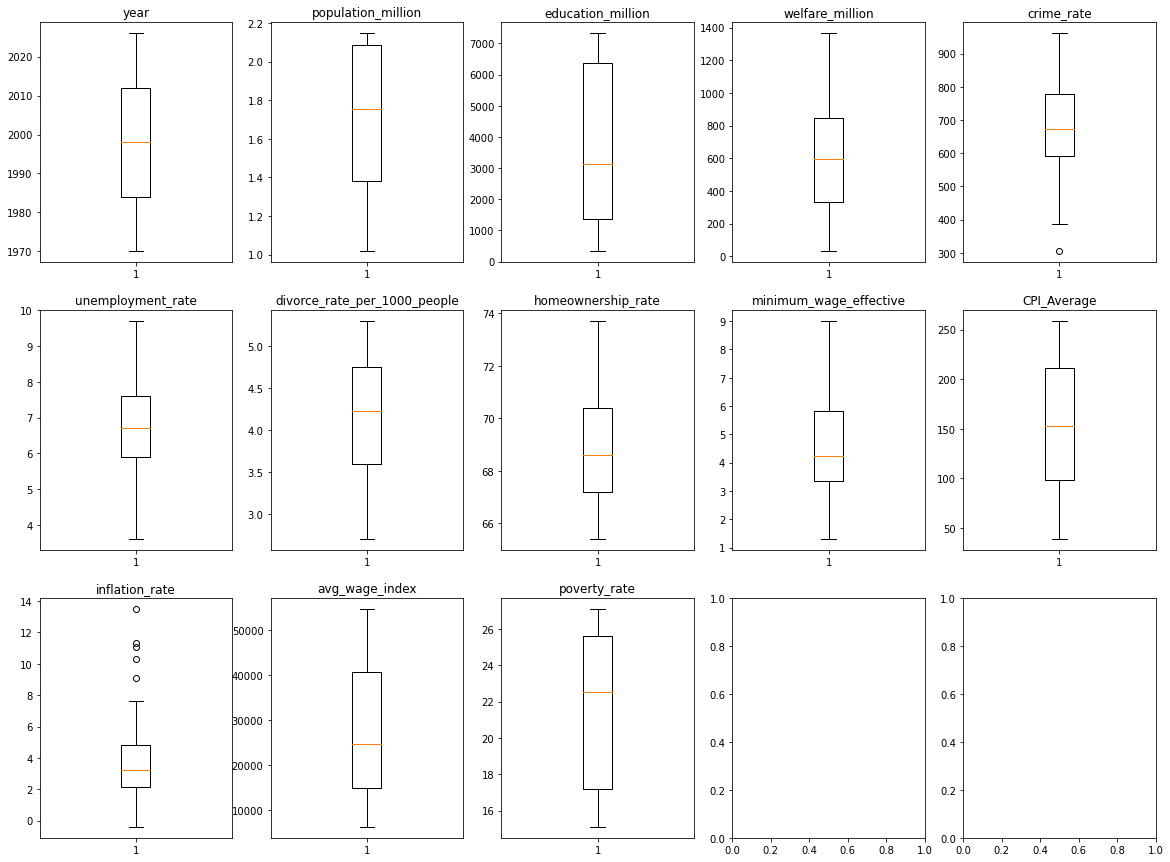

--------- New York---------


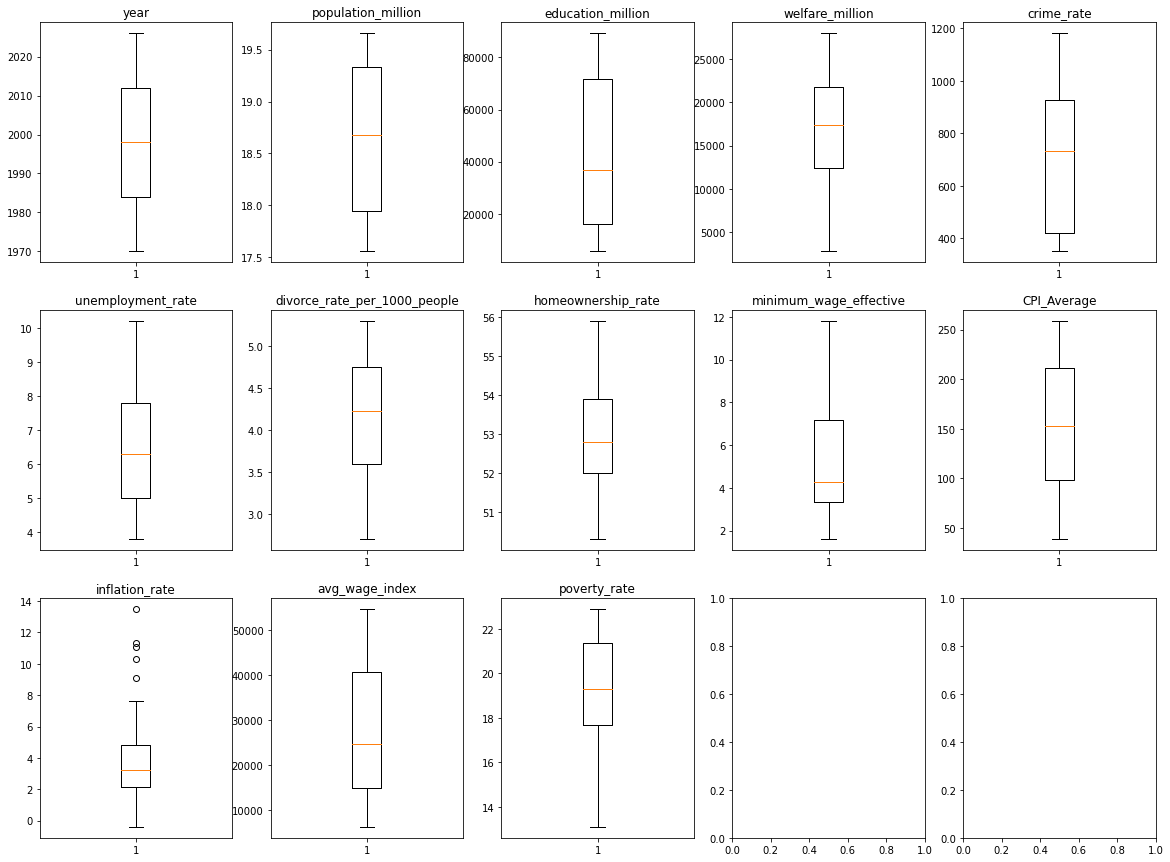

--------- North Carolina---------


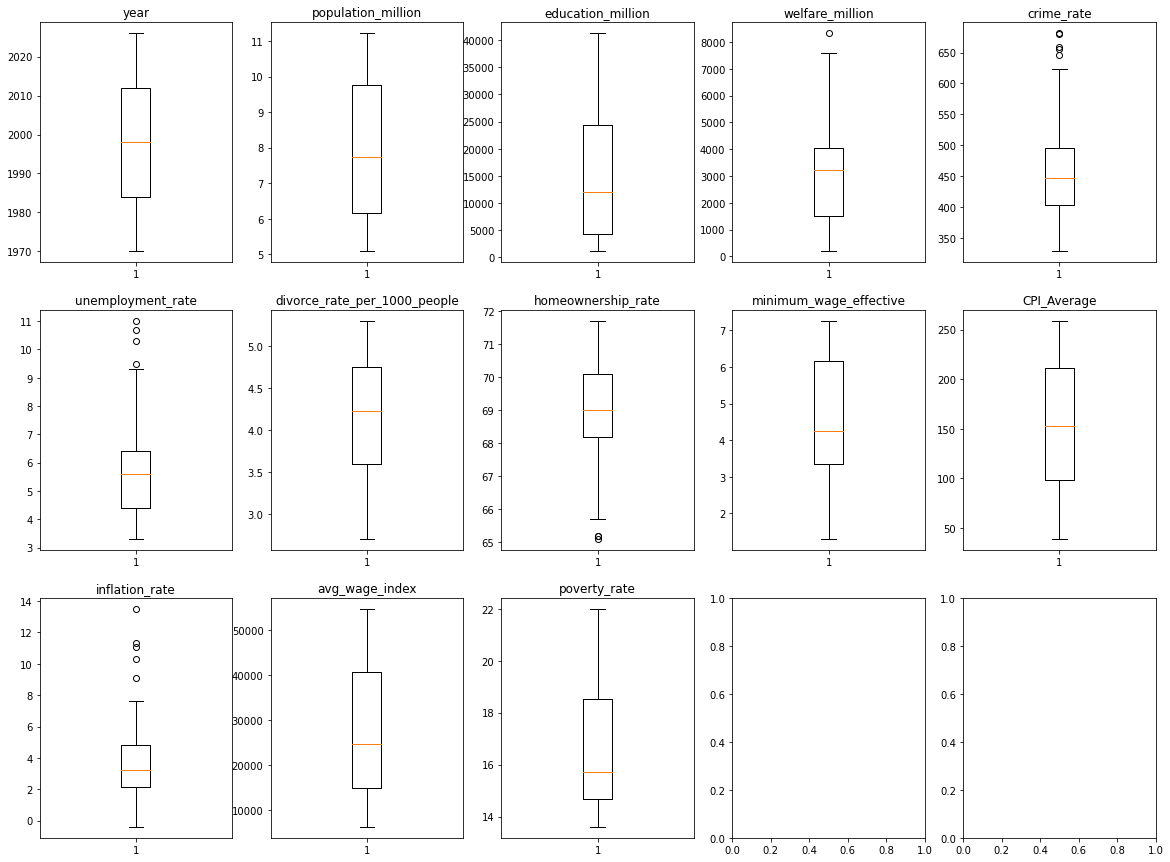

--------- North Dakota---------


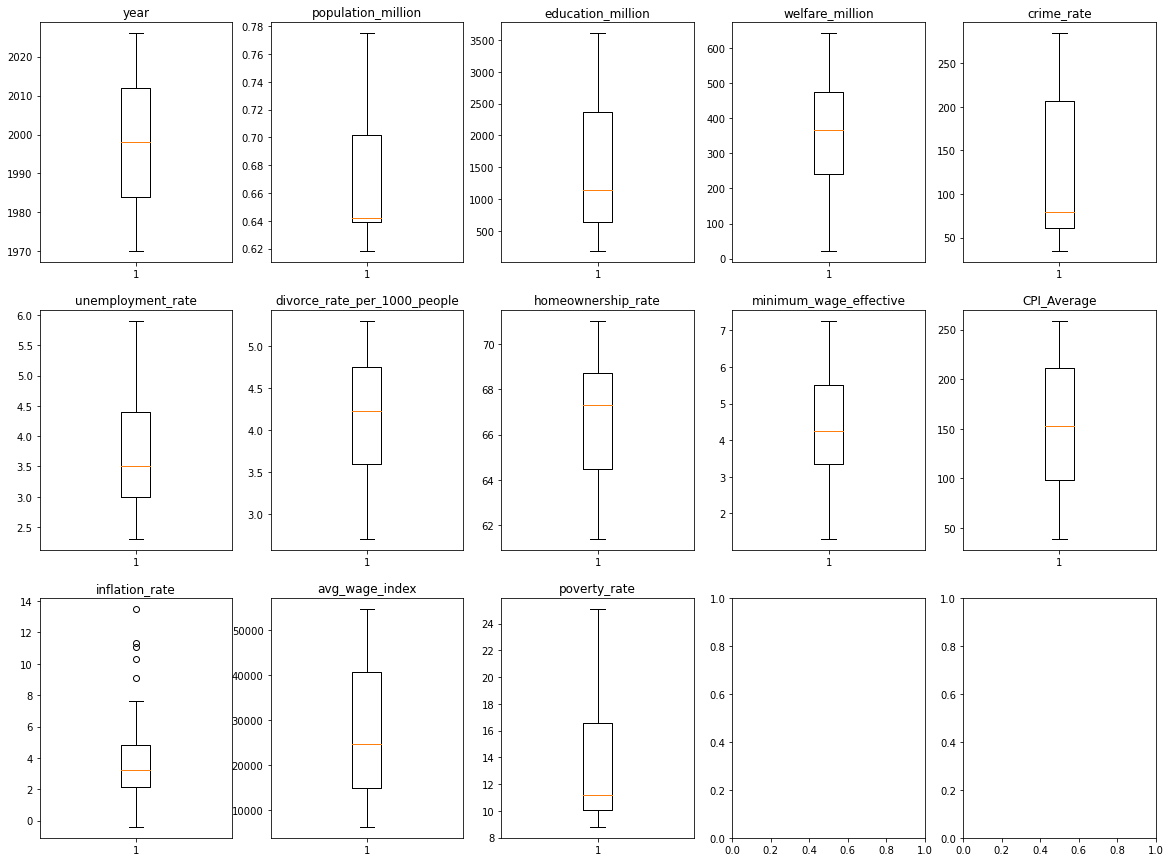

--------- Ohio---------


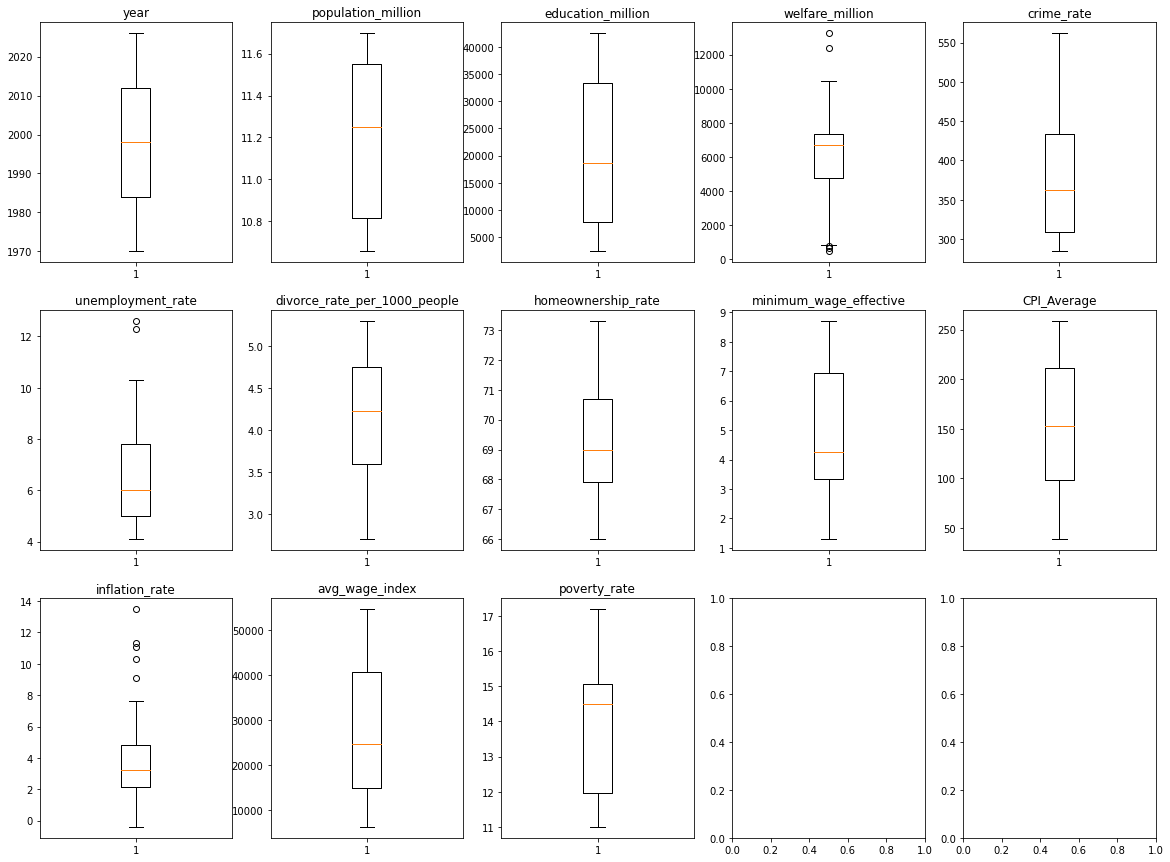

--------- Oklahoma---------


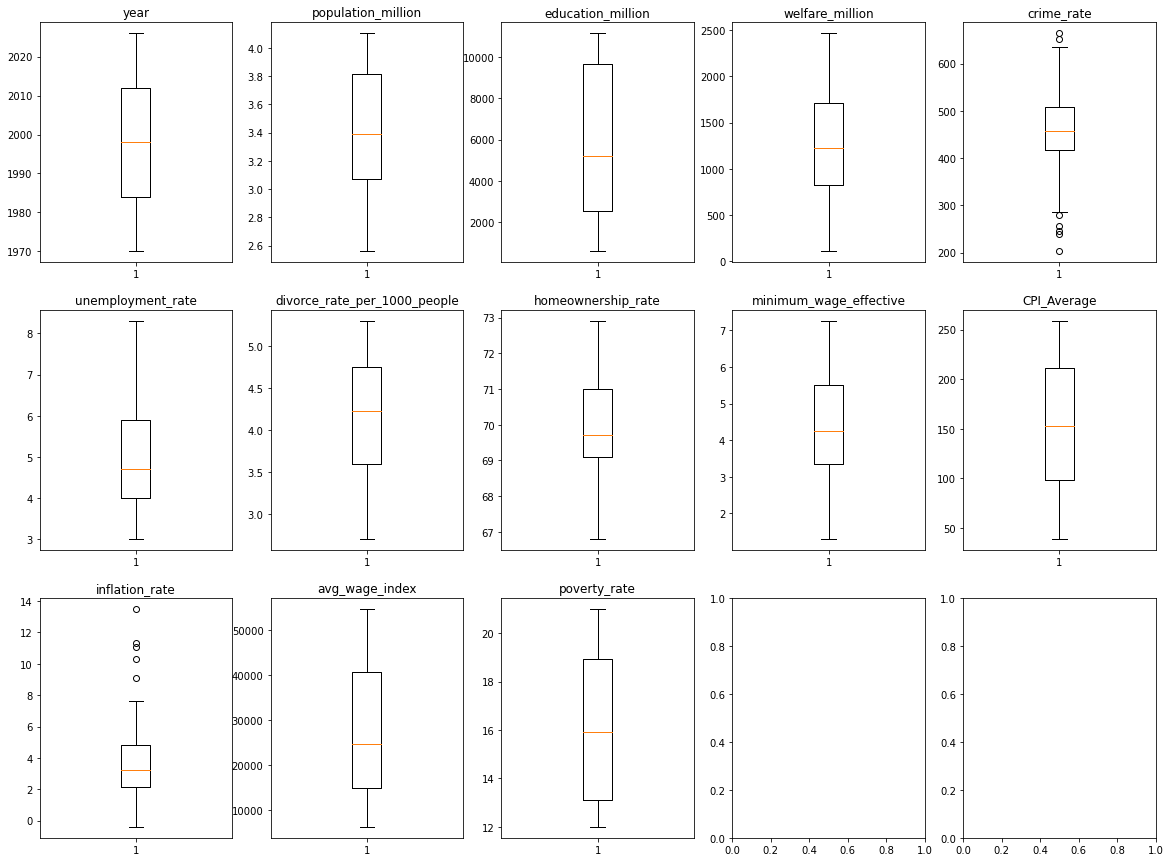

--------- Oregon---------


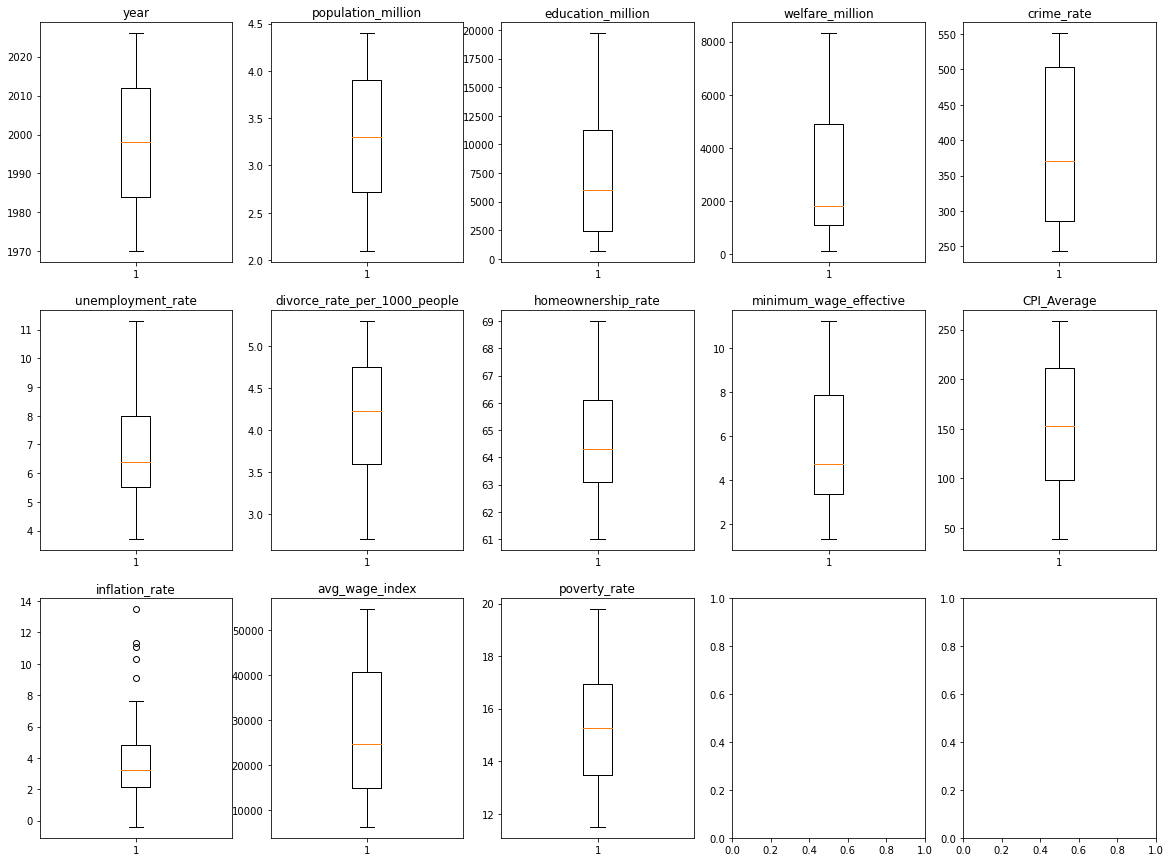

--------- Pennsylvania---------


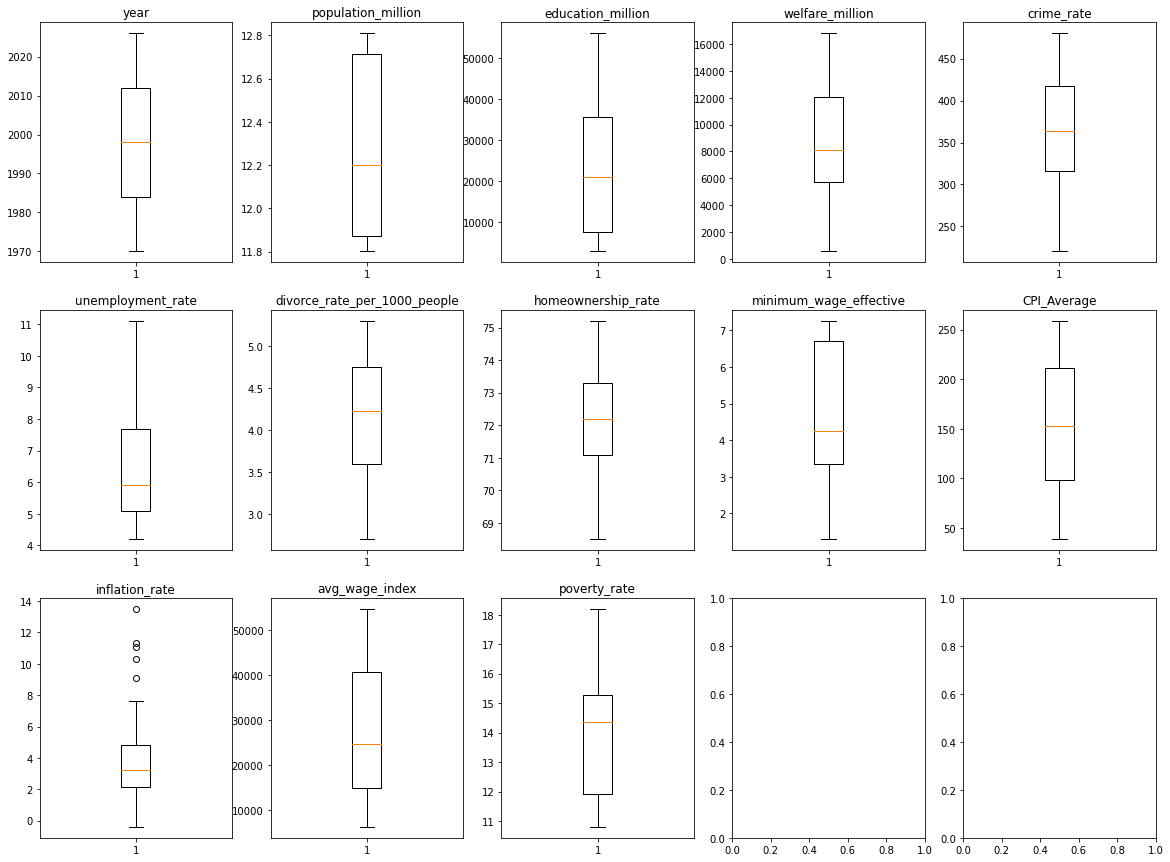

--------- Rhode Island---------


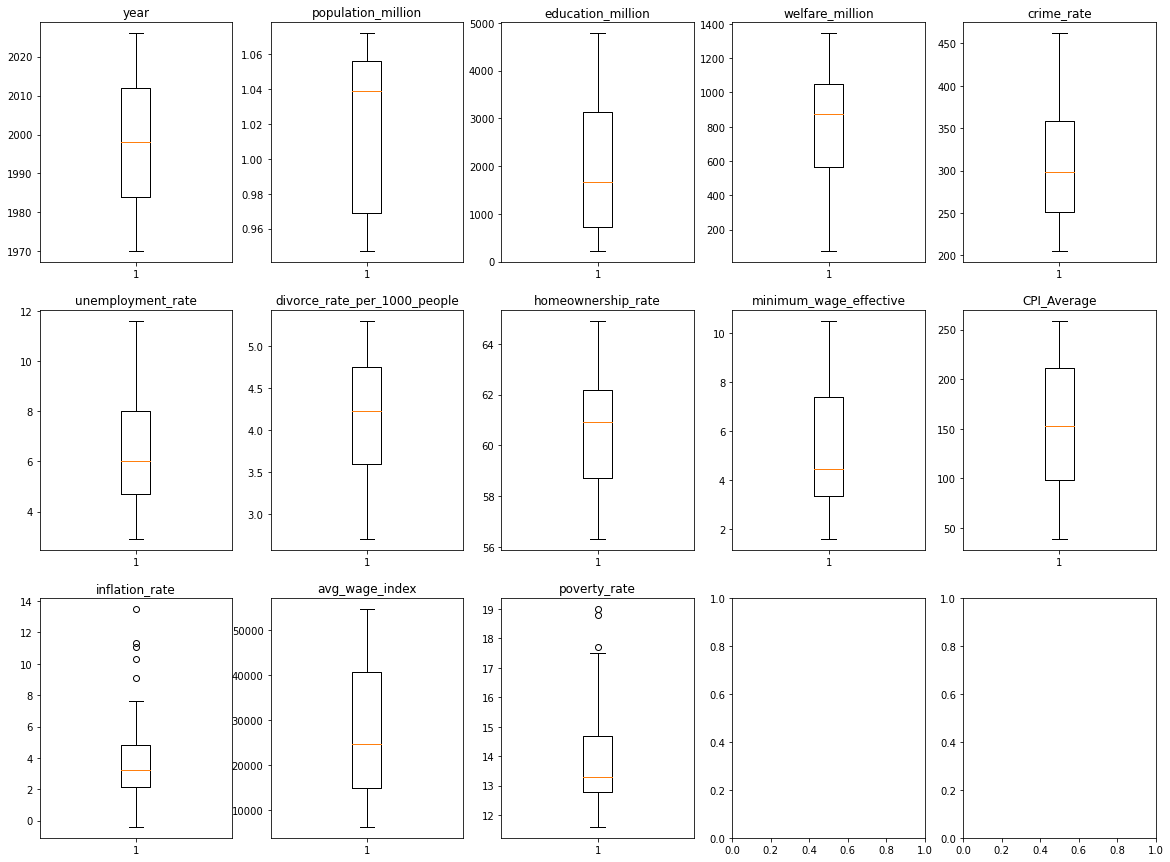

--------- South Carolina---------


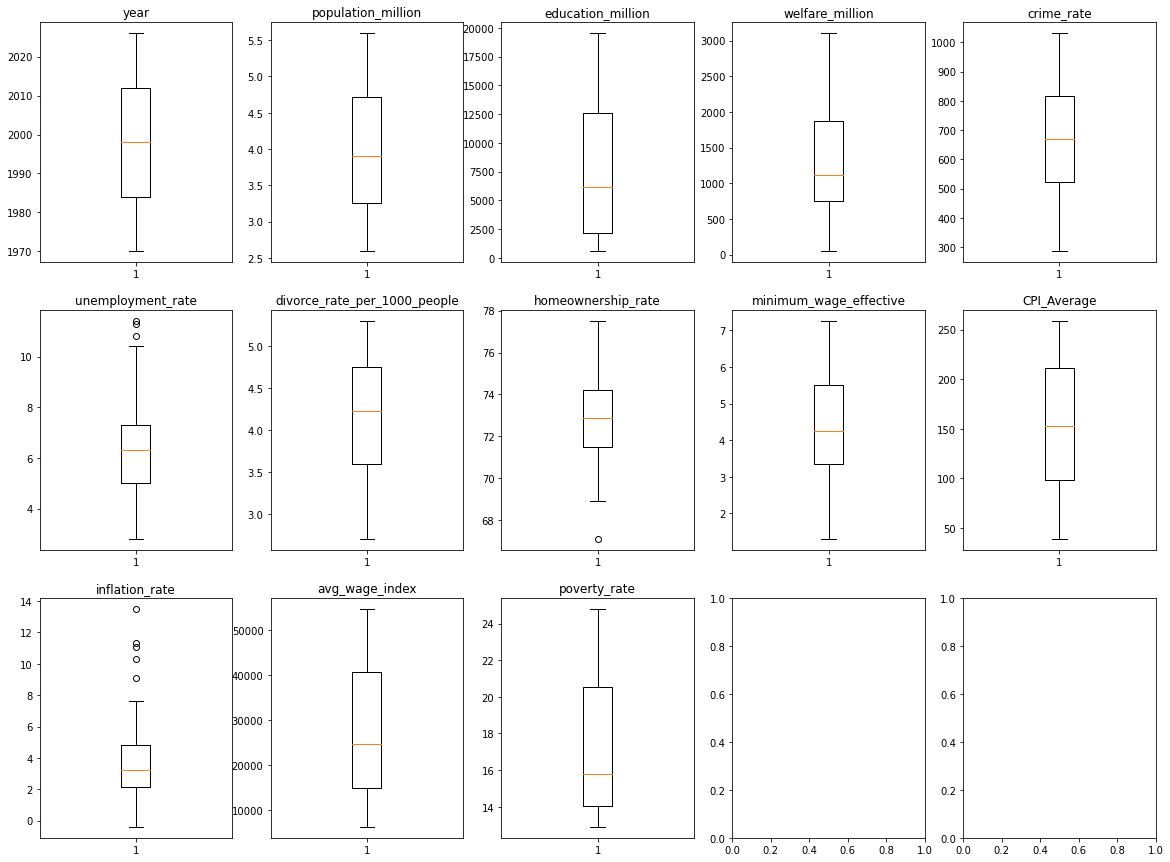

--------- South Dakota---------


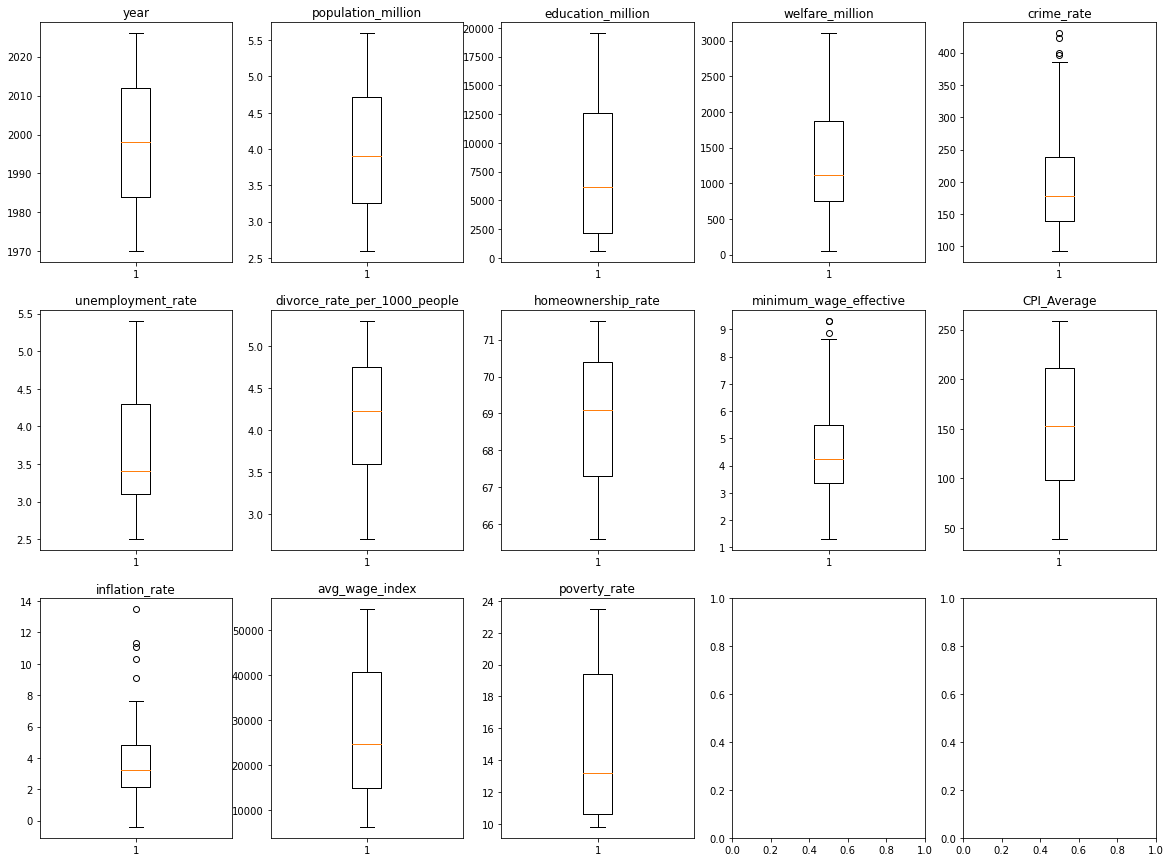

--------- Tennessee---------


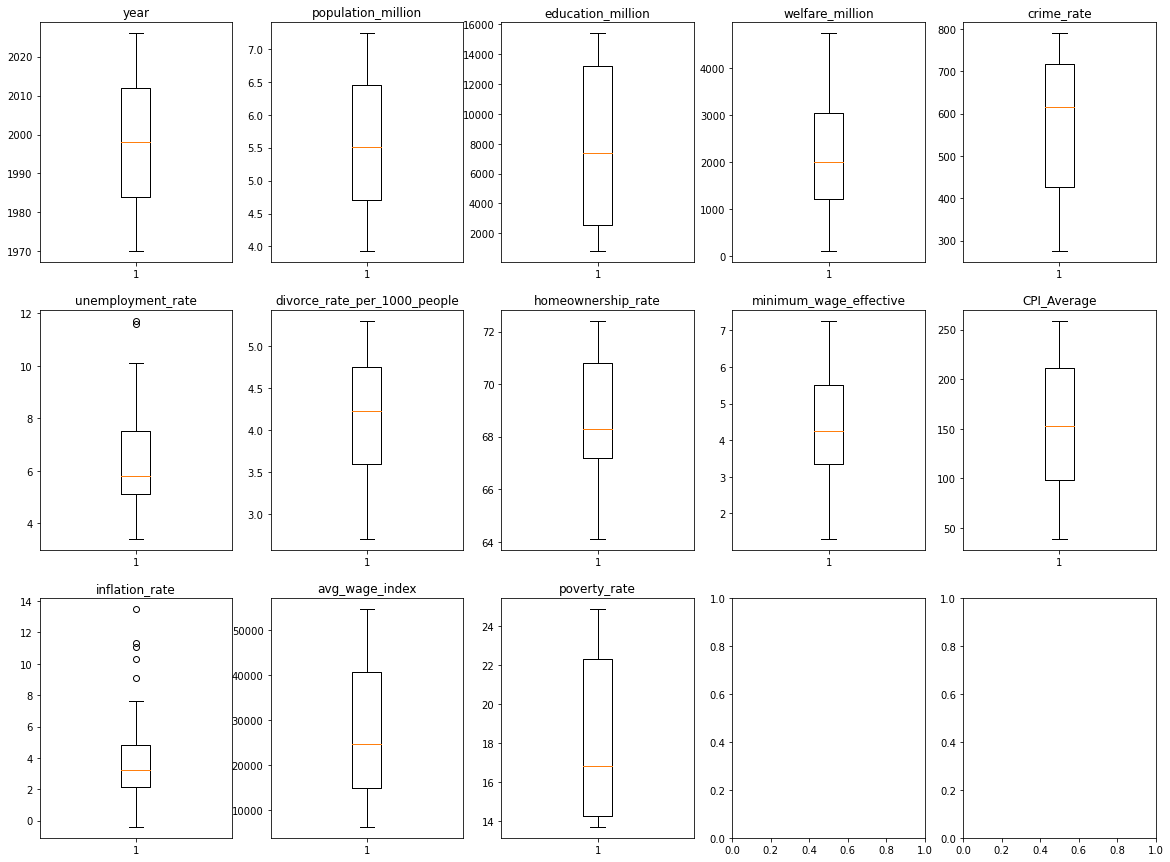

--------- Texas---------


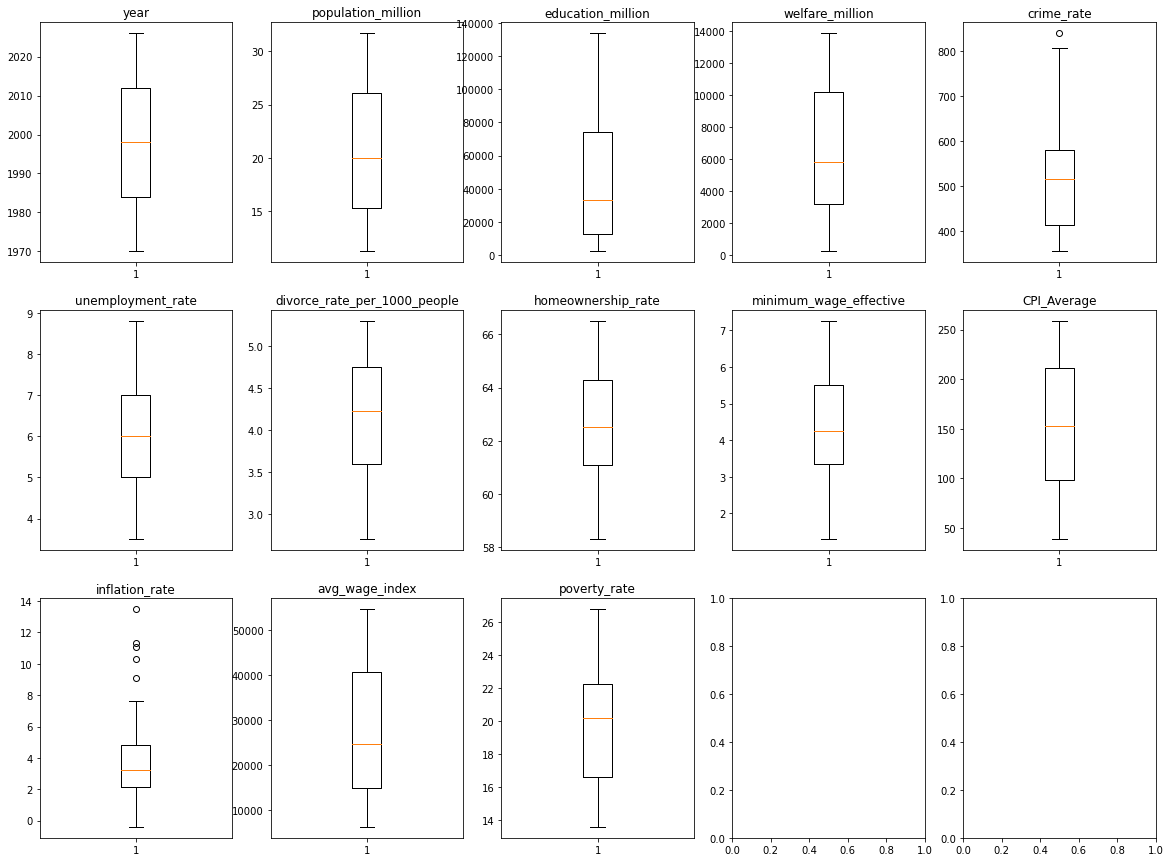

--------- Utah---------


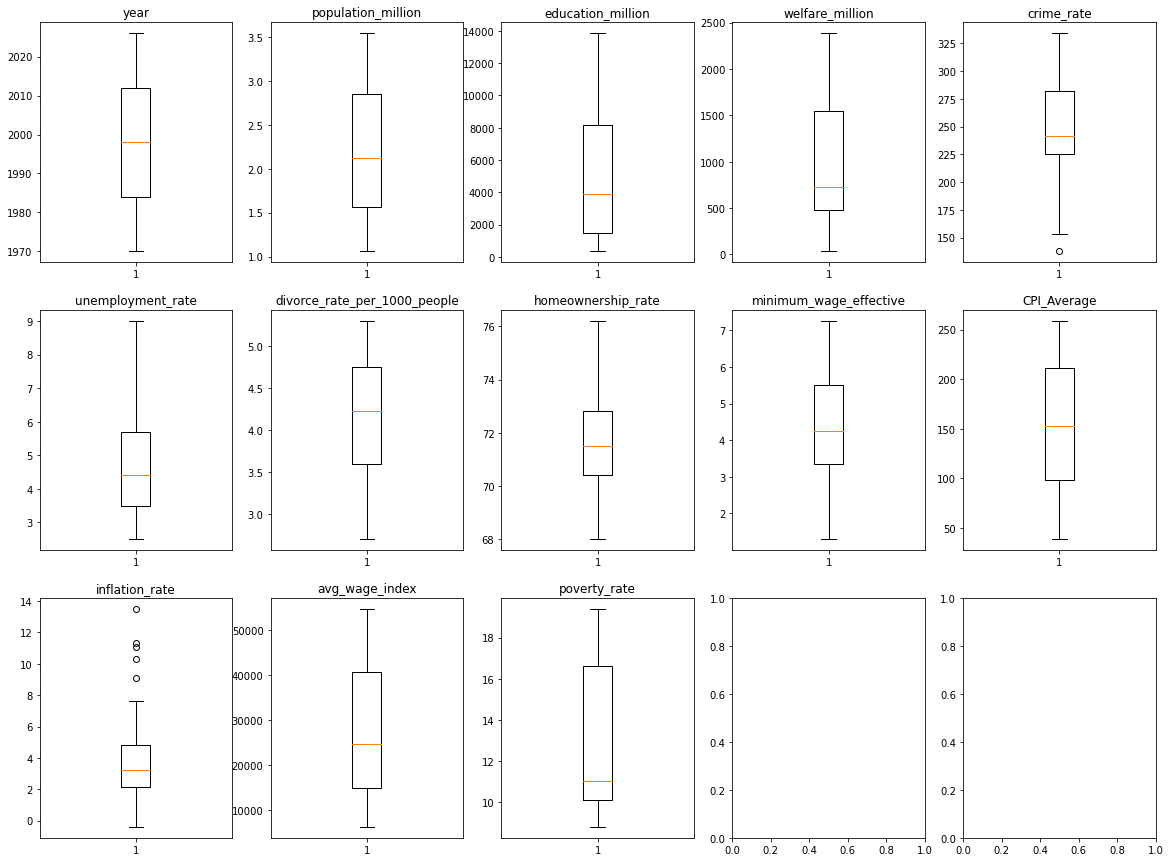

--------- Vermont---------


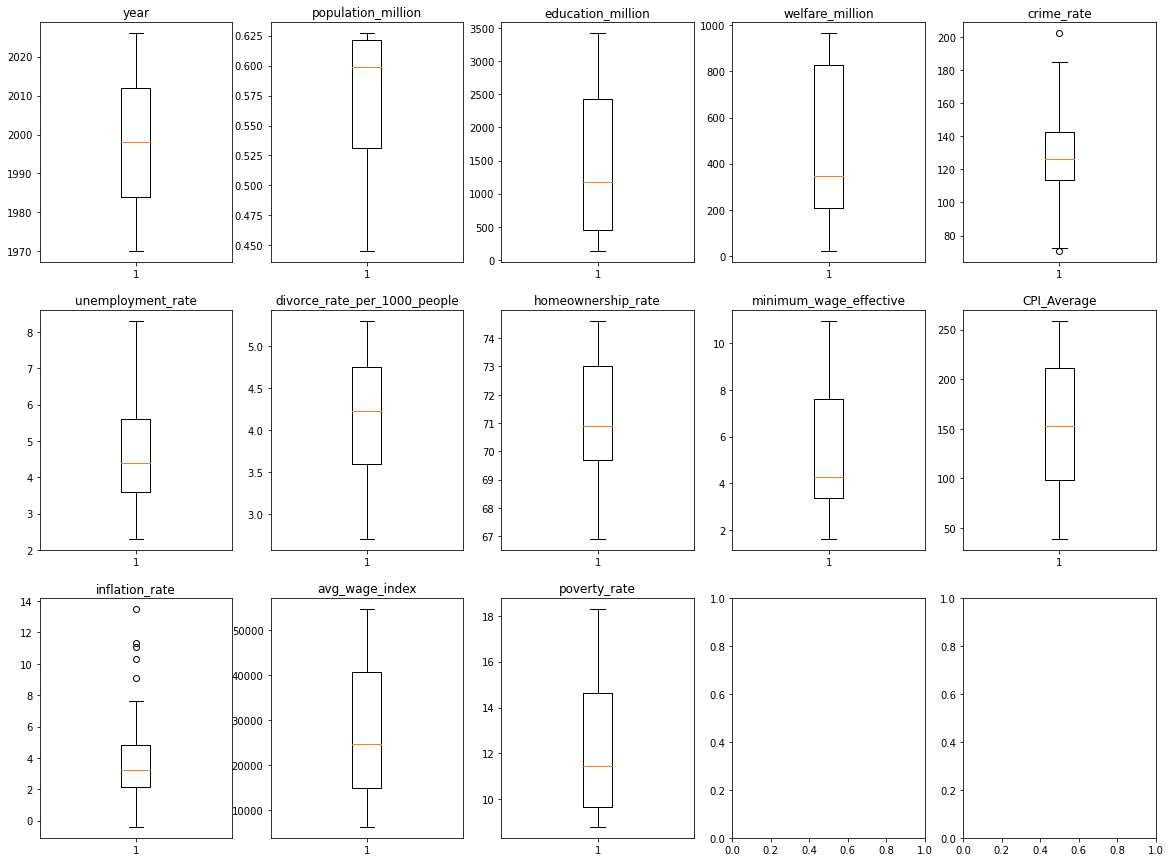

--------- Virginia---------


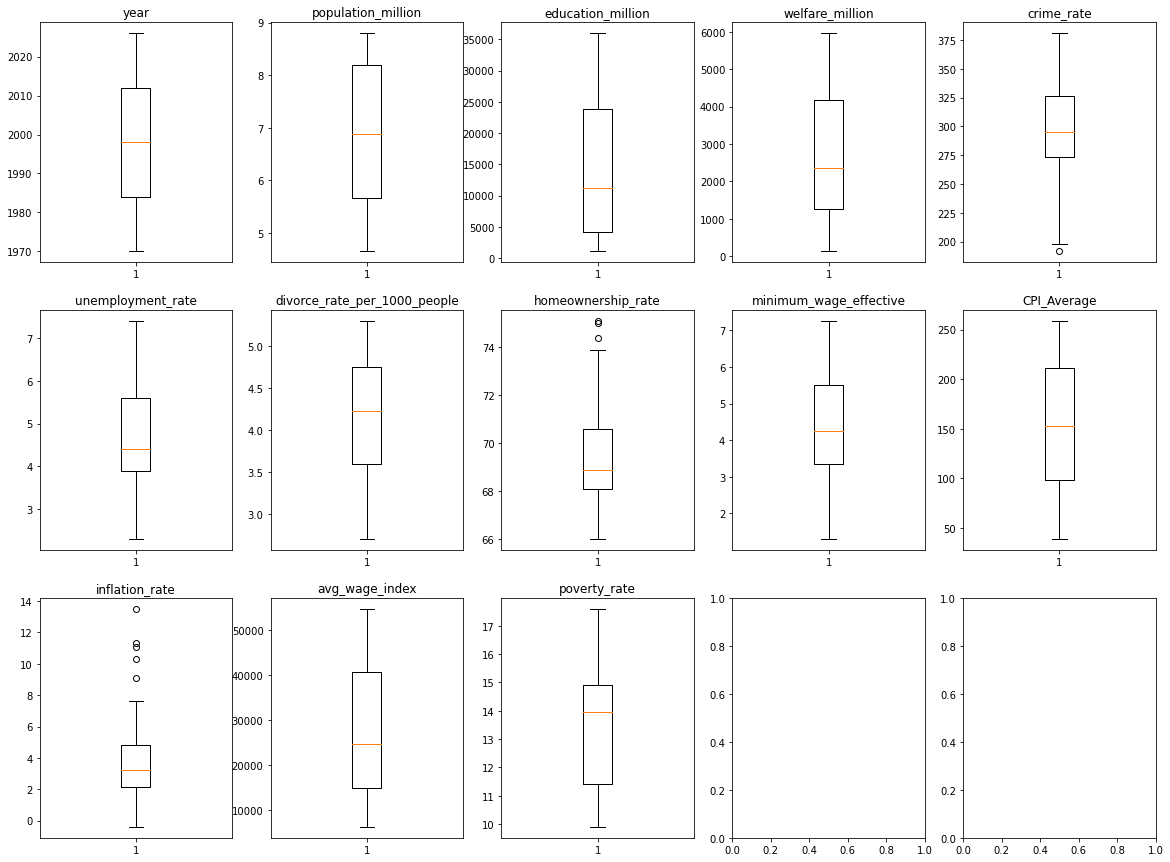

--------- Washington---------


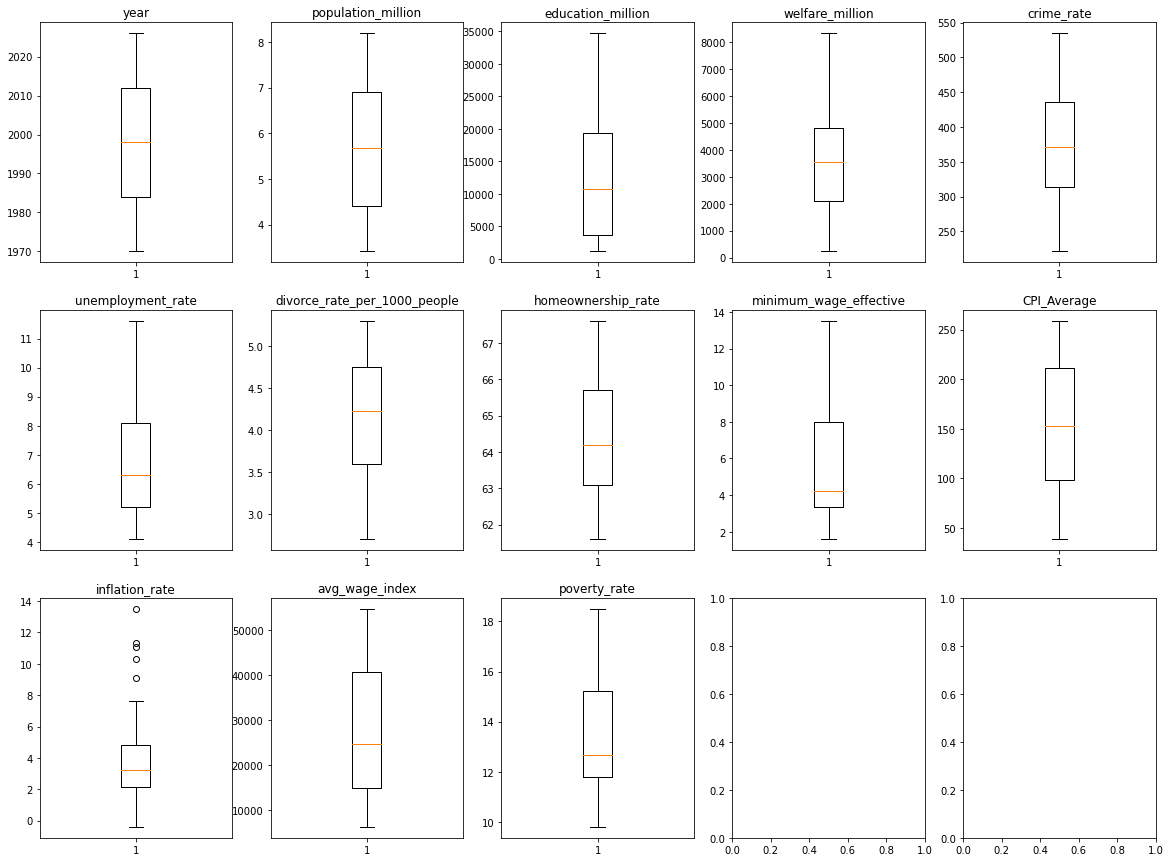

--------- West Virginia---------


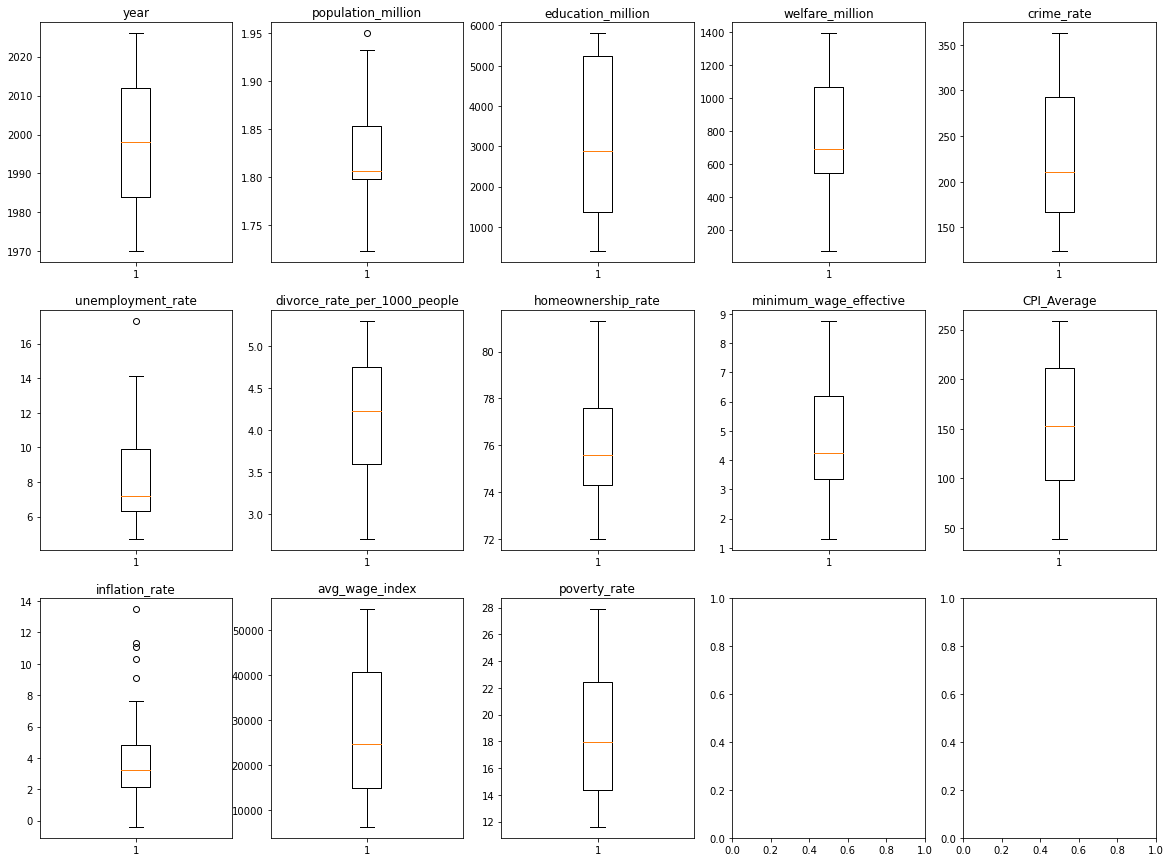

--------- Wisconsin---------


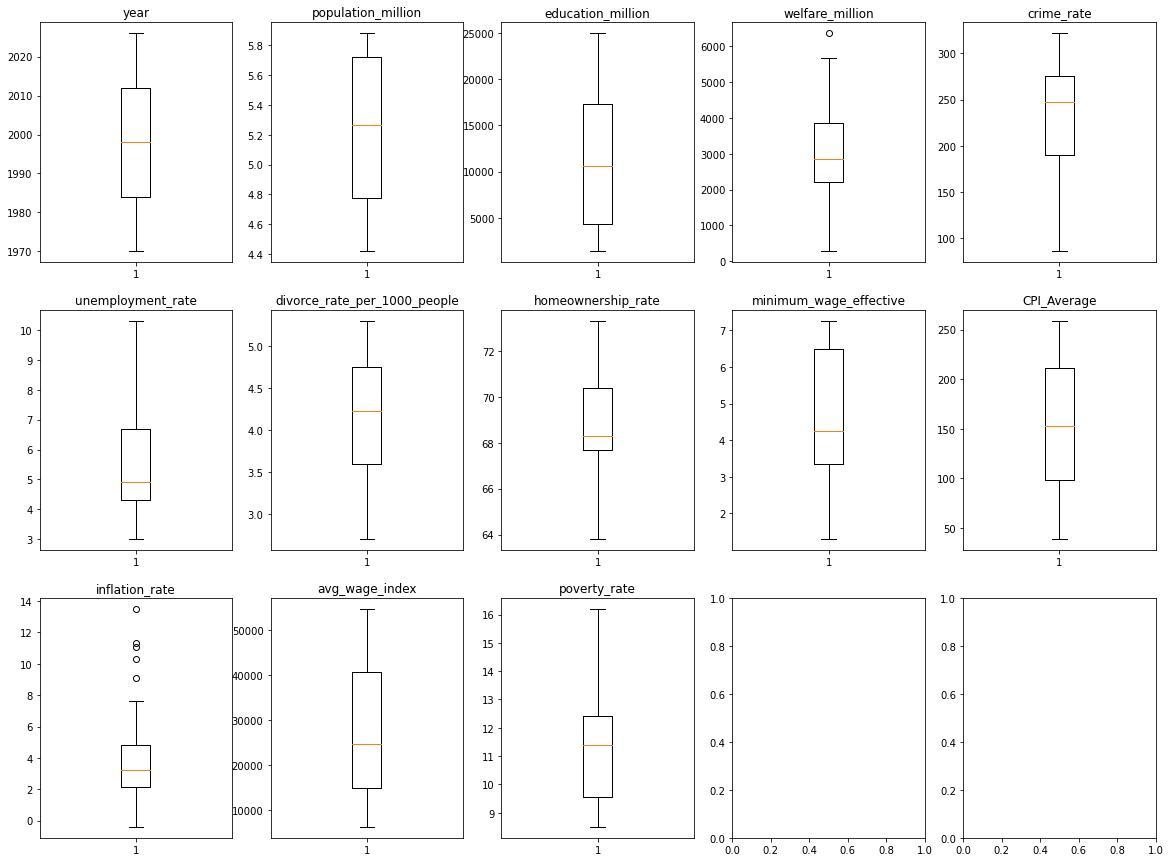

--------- Wyoming---------


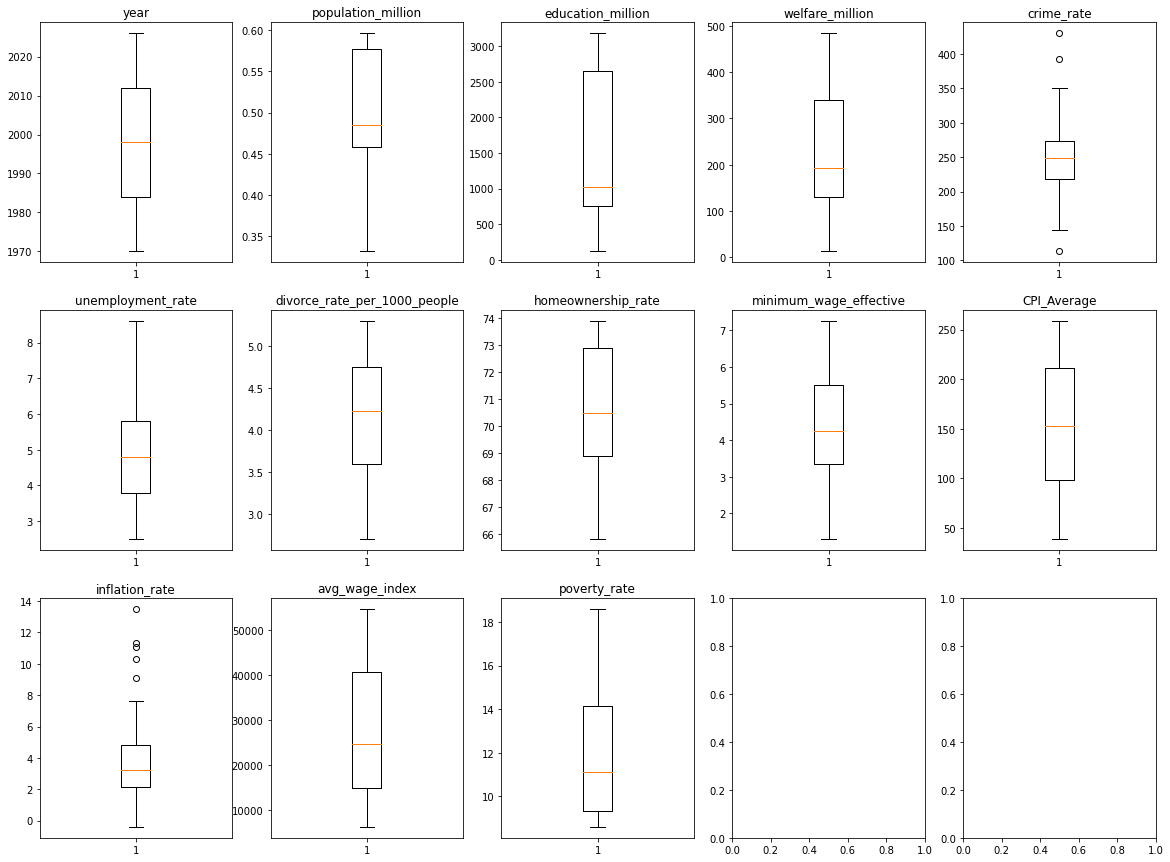

In [4]:

state_list = dataset_df.state.unique().tolist()
for state in state_list:
    print(f'--------- {state}---------')
    boxplots(dataset_df[dataset_df.state==state])

## Line plots over time for the selected variable

In [5]:
# Add per capita variables
dataset_df['education_per_capita']=dataset_df.education_million / dataset_df.population_million
dataset_df['welfare_per_capita']=dataset_df.welfare_million / dataset_df.population_million

In [6]:
variable_list = dataset_df.columns
state_list = dataset_df['state'].unique().tolist()
variable_list

Index(['year', 'state', 'population_million', 'education_million',
       'welfare_million', 'crime_rate', 'unemployment_rate',
       'divorce_rate_per_1000_people', 'homeownership_rate',
       'minimum_wage_effective', 'CPI_Average', 'inflation_rate',
       'avg_wage_index', 'poverty_rate', 'education_per_capita',
       'welfare_per_capita'],
      dtype='object')

### Line plots grouping states

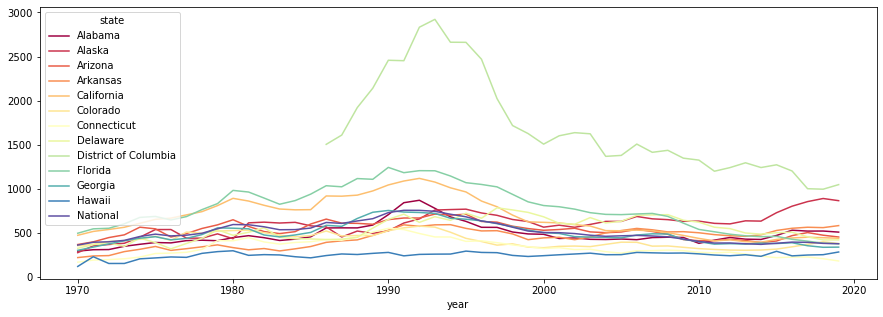

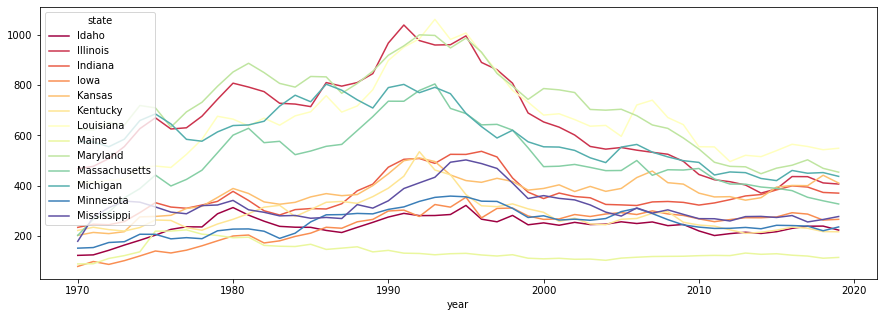

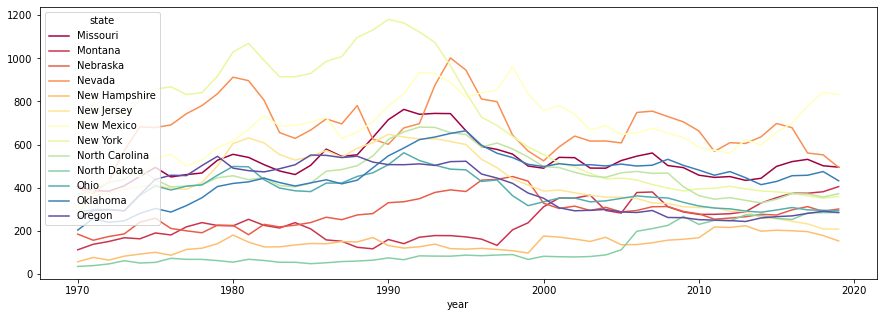

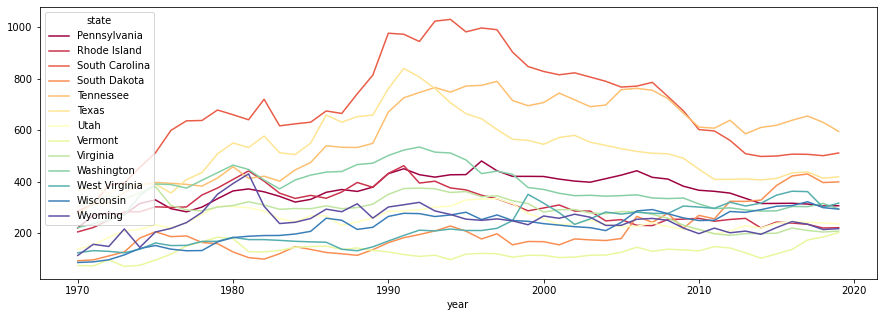

In [7]:
variable_name = 'crime_rate'

for i in range(0,52,13):
    small_list = state_list[i:i+13]
    plotting_df = dataset_df[(dataset_df['state'].isin(small_list))][['year','state',variable_name]].set_index('year')
    plotting_df = plotting_df.pivot_table(values= variable_name, index = plotting_df.index, columns = 'state')
#    print(plotting_df.head(20))

    plotting_df.plot.line(colormap='Spectral', figsize=(15,5), legend=True )

## Boxplot

<AxesSubplot:title={'center':'poverty_rate'}, xlabel='state'>

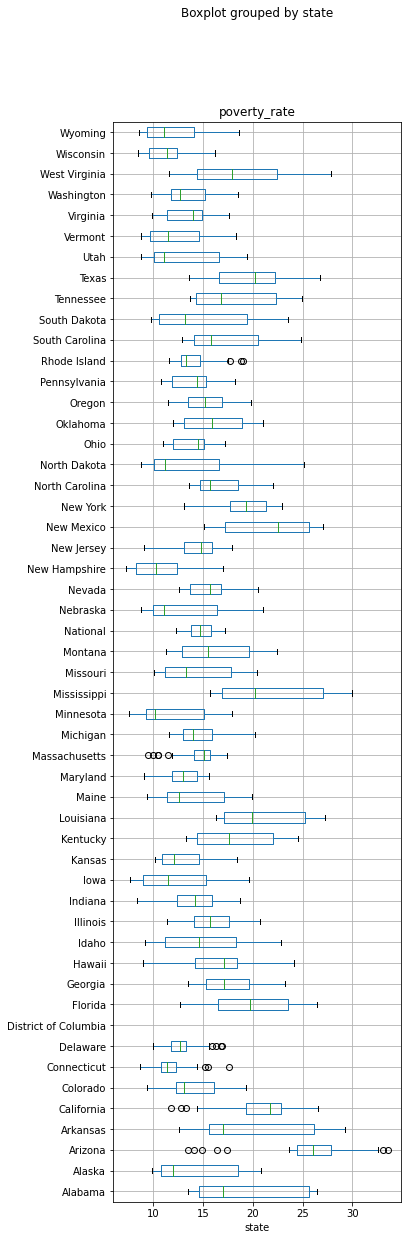

In [8]:
 dataset_df.boxplot(column='poverty_rate', by='state', figsize=(5,20), vert=False)

## Scatter plot, colored by state

<AxesSubplot:xlabel='poverty_rate', ylabel='crime_rate'>

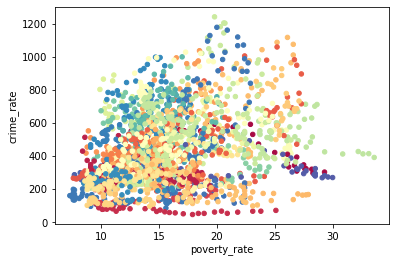

In [9]:
cmap = matplotlib.cm.get_cmap('Spectral')
color_dict = pd.Series({k:cmap(np.random.rand()) for k in dataset_df['state'].unique()})
color_dict.name = 'color_dict'
plotting_df = pd.merge(dataset_df,color_dict, how='left', left_on='state', right_index=True)
plotting_df.plot.scatter(x='poverty_rate', y='crime_rate', c='color_dict')


## Scatter Plots, grouping states

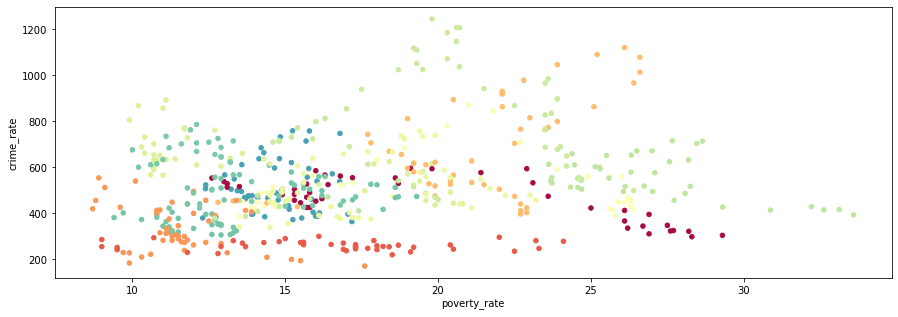

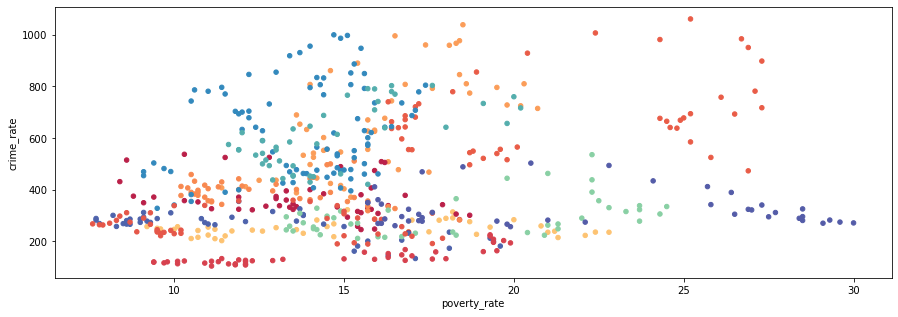

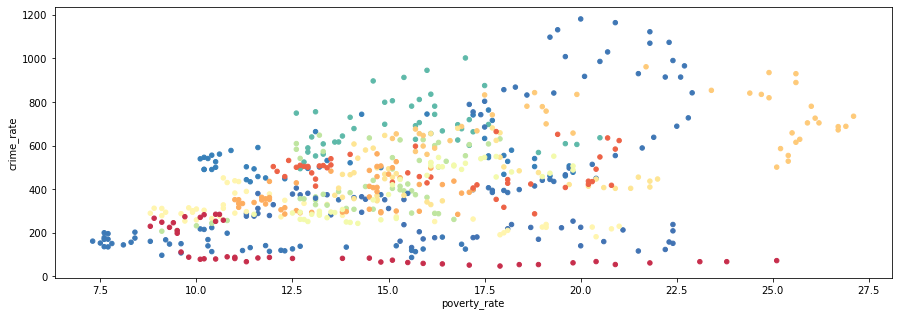

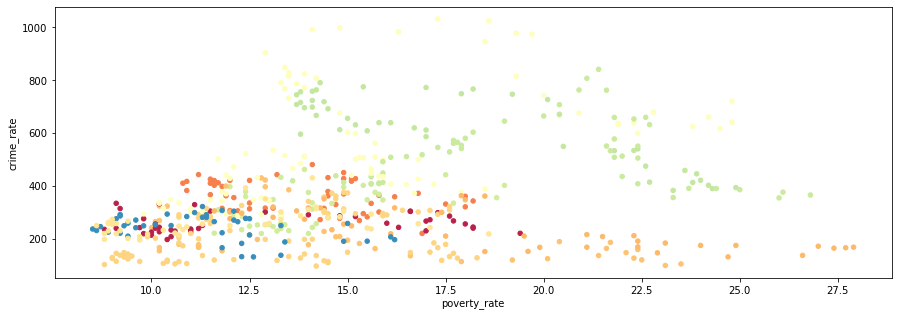

In [10]:
# Plot states in groups of 13
for i in range(0,52,13):
    small_list = state_list[i:i+13]
    plotting_df = dataset_df[(dataset_df['state'].isin(small_list))]
    plotting_df = pd.merge(plotting_df,color_dict, how='left', left_on='state', right_index=True)
    #z = np.polyfit()
    plotting_df.plot.scatter(x='poverty_rate', y='crime_rate', c='color_dict', figsize=(15,5))
   

## Time plots using 1 state only

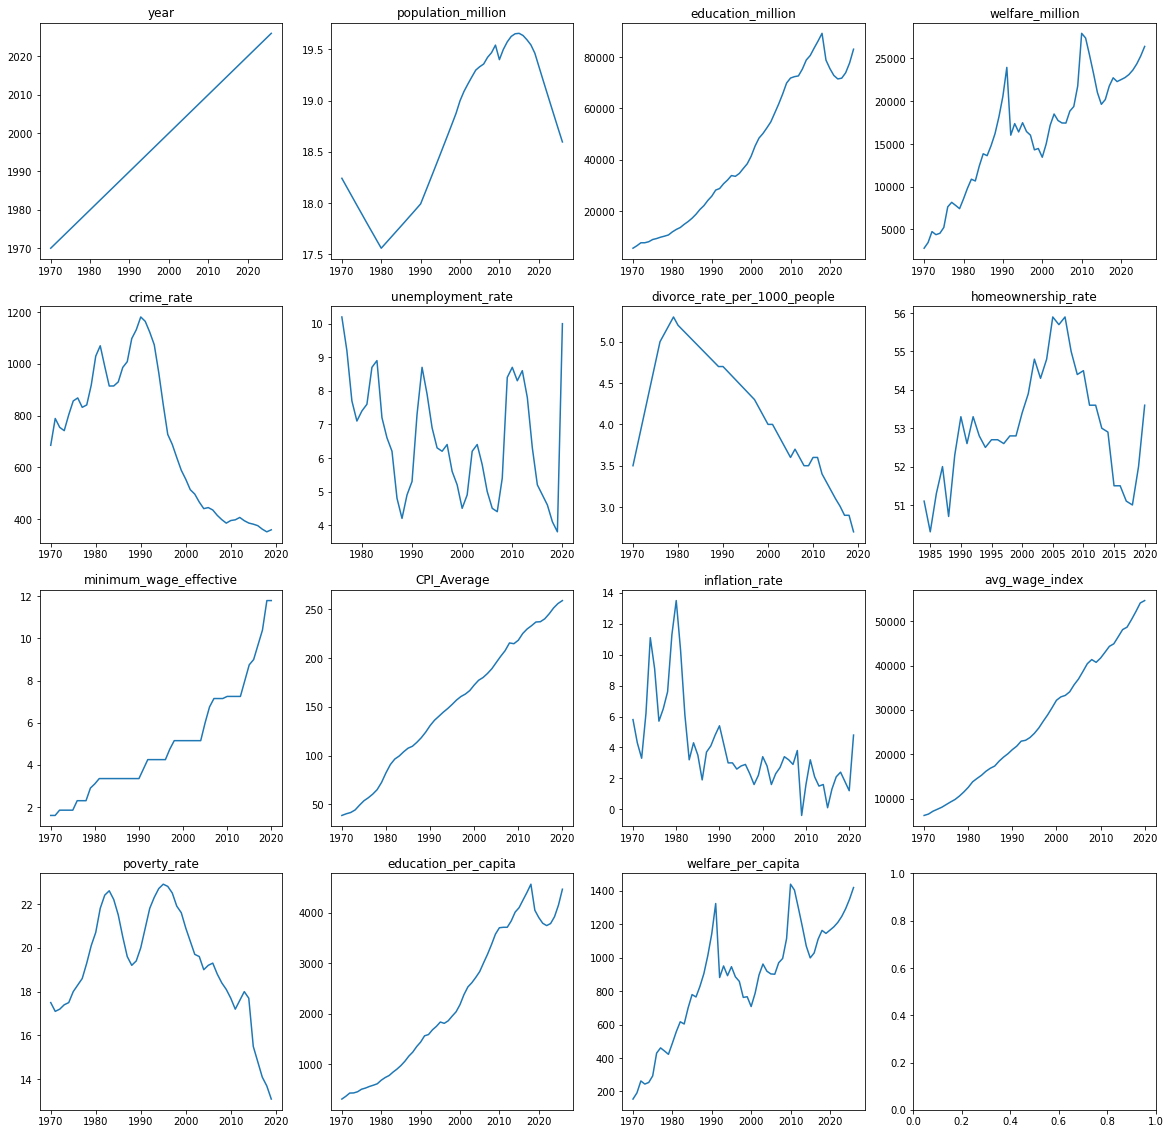

In [11]:
state = 'New York'
# timeplots( dataframe with data, column_with_period_values)
timeplots(dataset_df.loc[dataset_df['state']==state],'year')

## Cross plots of all features vs poverty rate

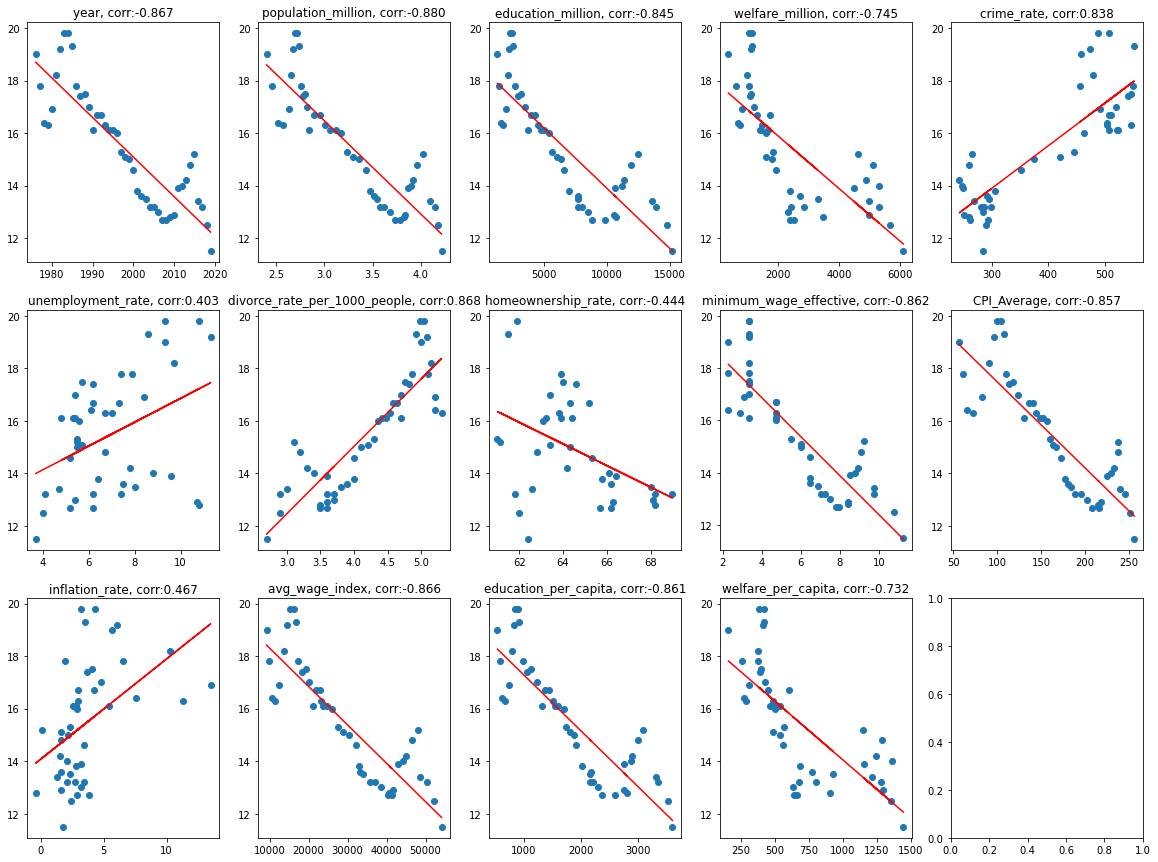

year  population_million  education_million  \
year                          1.000000            0.997294           0.972352   
population_million            0.997294            1.000000           0.969543   
education_million             0.972352            0.969543           1.000000   
welfare_million               0.937144            0.931794           0.982377   
crime_rate                   -0.567213           -0.593161          -0.662279   
unemployment_rate            -0.310850           -0.279944          -0.279020   
divorce_rate_per_1000_people -0.778699           -0.780133          -0.855743   
homeownership_rate            0.120533            0.145359           0.038494   
minimum_wage_effective        0.986687            0.991373           0.990268   
CPI_Average                   0.998577            0.993961           0.967068   
inflation_rate               -0.664574           -0.638120          -0.605330   
avg_wage_index                0.995021            0.995268           0.989434   
poverty_rate                 -0.867268           -0.880164          -0.844842   
education_per_capita          0.989220            0.985579           0.995517   
welfare_per_capita            0.948909            0.943195           0.976940   

                              welfare_million  crime_rate  unemployment_rate  \
year                                 0.937144   -0.567213          -0.310850   
population_million                   0.931794   -0.593161          -0.279944   
education_million                    0.982377   -0.662279          -0.279020   
welfare_million                      1.000000   -0.629605          -0.146494   
crime_rate                          -0.629605    1.000000           0.055088   
unemployment_rate                   -0.146494    0.055088           1.000000   
divorce_rate_per_1000_people        -0.805757    0.879877           0.352384   
homeownership_rate                  -0.004204   -0.379326           0.414335   
minimum_wage_effective               0.955541   -0.629040          -0.255958   
CPI_Average                          0.923386   -0.552807          -0.296338   
inflation_rate                      -0.552771    0.407556           0.178087   
avg_wage_index                       0.947852   -0.625925          -0.301581   
poverty_rate                        -0.744829    0.838157           0.403051   
education_per_capita                 0.970522   -0.620731          -0.295170   
welfare_per_capita                   0.996010   -0.573880          -0.120228   

                              divorce_rate_per_1000_people  \
year                                             -0.778699   
population_million                               -0.780133   
education_million                                -0.855743   
welfare_million                                  -0.805757   
crime_rate                                        0.879877   
unemployment_rate                                 0.352384   
divorce_rate_per_1000_people                      1.000000   
homeownership_rate                               -0.101097   
minimum_wage_effective                           -0.814474   
CPI_Average                                      -0.767743   
inflation_rate                                    0.628081   
avg_wage_index                                   -0.823728   
poverty_rate                                      0.868075   
education_per_capita                             -0.826707   
welfare_per_capita                               -0.757110   

                              homeownership_rate  minimum_wage_effective  \
year                                    0.120533                0.986687   
population_million                      0.145359                0.991373   
education_million                       0.038494                0.990268   
welfare_million                        -0.004204                0.955541   
crime_rate                             -0.379326               -0.629040   
unemplo

In [12]:
state = "Oregon"
# crossplots(dataframe_with_data , target_variable_name, show_trendline=False|True)
crossplots(dataset_df.loc[dataset_df['state']==state],'poverty_rate', True)
dataset_df.loc[dataset_df['state']==state].corr()

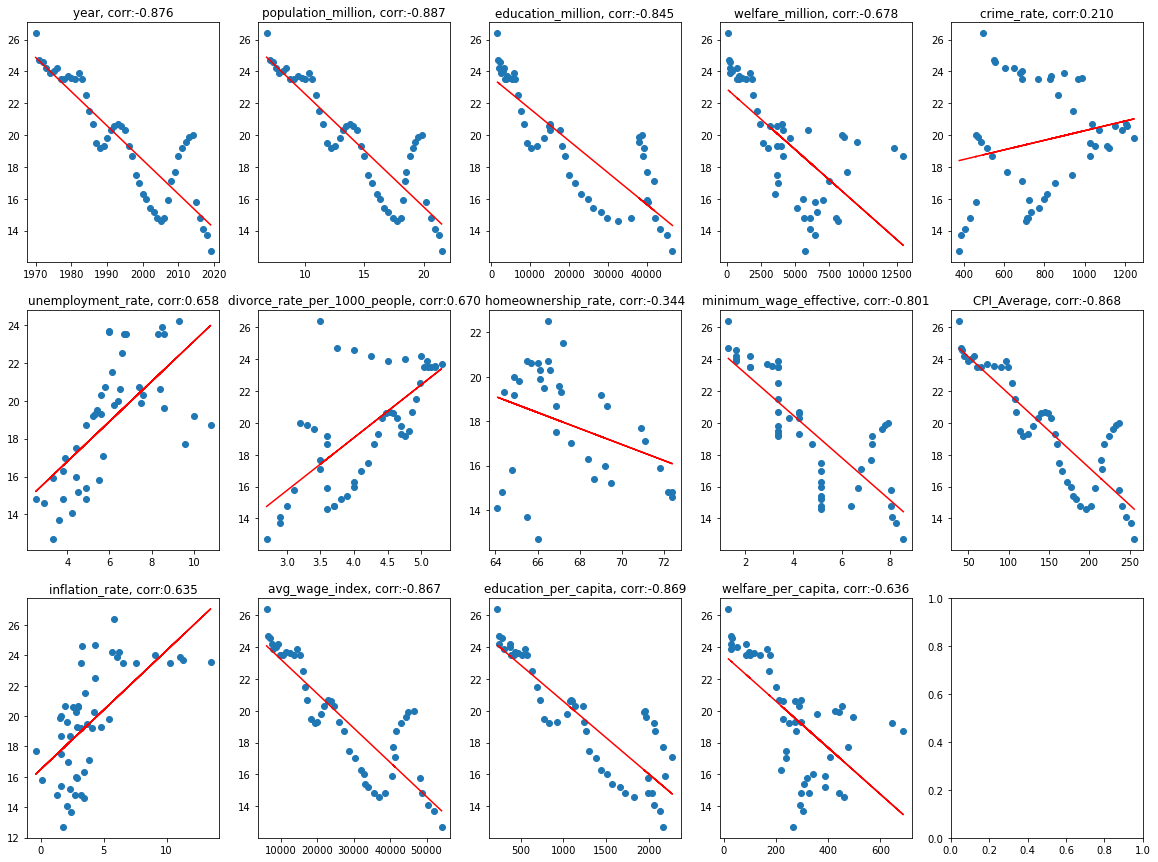

year  population_million  education_million  \
year                          1.000000            0.999323           0.983167   
population_million            0.999323            1.000000           0.981093   
education_million             0.983167            0.981093           1.000000   
welfare_million               0.784114            0.793346           0.771395   
crime_rate                   -0.373501           -0.360619          -0.499228   
unemployment_rate            -0.239109           -0.262583          -0.205577   
divorce_rate_per_1000_people -0.778699           -0.777148          -0.850052   
homeownership_rate            0.166789            0.201715           0.287755   
minimum_wage_effective        0.983340            0.978672           0.974012   
CPI_Average                   0.998577            0.998496           0.975254   
inflation_rate               -0.664574           -0.668041          -0.628583   
avg_wage_index                0.995021            0.993505           0.989159   
poverty_rate                 -0.875522           -0.886947          -0.844901   
education_per_capita          0.983306            0.986317           0.984951   
welfare_per_capita            0.629330            0.643590           0.590428   

                              welfare_million  crime_rate  unemployment_rate  \
year                                 0.784114   -0.373501          -0.239109   
population_million                   0.793346   -0.360619          -0.262583   
education_million                    0.771395   -0.499228          -0.205577   
welfare_million                      1.000000   -0.320905           0.082900   
crime_rate                          -0.320905    1.000000           0.033545   
unemployment_rate                    0.082900    0.033545           1.000000   
divorce_rate_per_1000_people        -0.665049    0.716392           0.309439   
homeownership_rate                   0.394510   -0.165747          -0.141751   
minimum_wage_effective               0.840789   -0.449830          -0.137268   
CPI_Average                          0.866915   -0.345013          -0.230911   
inflation_rate                      -0.607195    0.198264           0.094133   
avg_wage_index                       0.842427   -0.451540          -0.238868   
poverty_rate                        -0.677618    0.209518           0.658135   
education_per_capita                 0.837875   -0.380781          -0.229023   
welfare_per_capita                   0.956618   -0.109531           0.135801   

                              divorce_rate_per_1000_people  \
year                                             -0.778699   
population_million                               -0.777148   
education_million                                -0.850052   
welfare_million                                  -0.665049   
crime_rate                                        0.716392   
unemployment_rate                                 0.309439   
divorce_rate_per_1000_people                      1.000000   
homeownership_rate                               -0.152152   
minimum_wage_effective                           -0.779359   
CPI_Average                                      -0.767743   
inflation_rate                                    0.628081   
avg_wage_index                                   -0.823728   
poverty_rate                                      0.670347   
education_per_capita                             -0.794972   
welfare_per_capita                               -0.506649   

                              homeownership_rate  minimum_wage_effective  \
year                                    0.166789                0.983340   
population_million                      0.201715                0.978672   
education_million                       0.287755                0.974012   
welfare_million                         0.394510                0.840789   
crime_rate                             -0.165747               -0.449830   
unemplo

In [13]:
state = "Florida"
# crossplots(dataframe_with_data , target_variable_name, show_trendline=False|True)
crossplots(dataset_df.loc[dataset_df['state']==state],'poverty_rate', True)
dataset_df.loc[dataset_df['state']==state].corr()

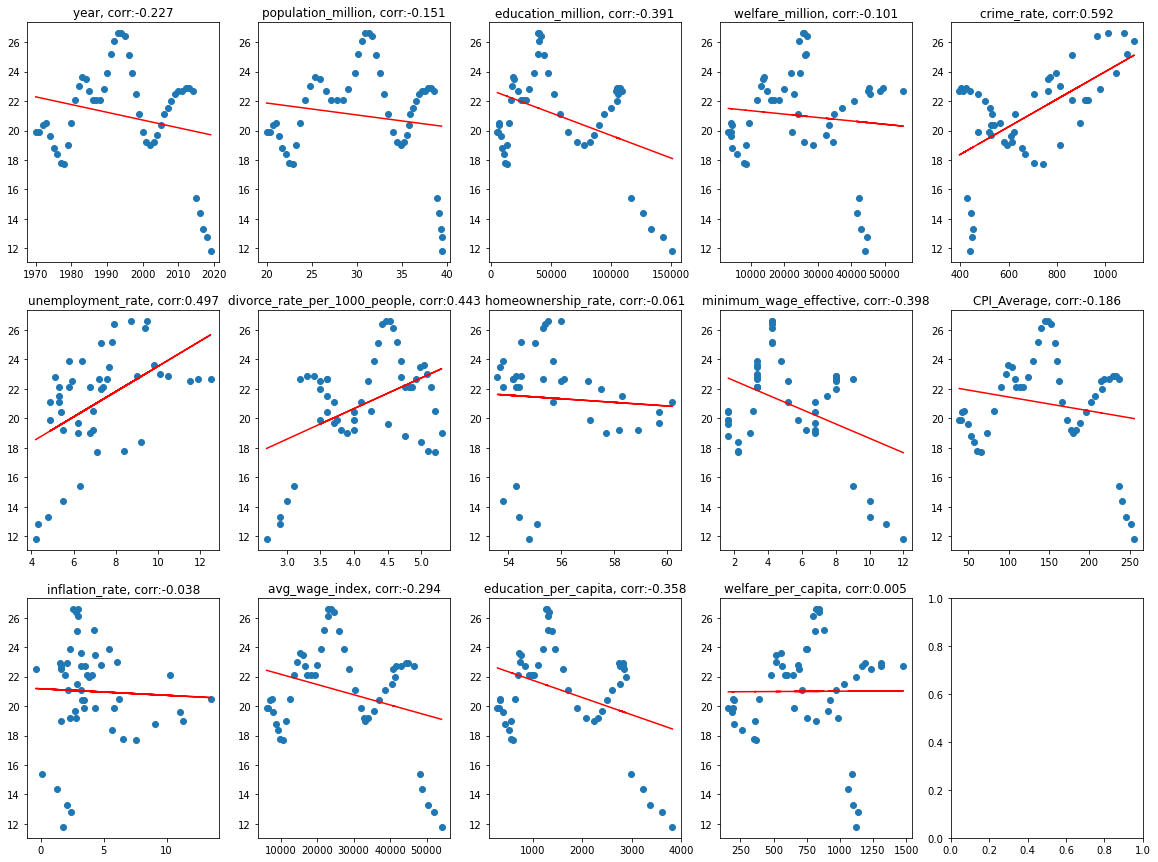

year  population_million  education_million  \
year                          1.000000            0.980446           0.968721   
population_million            0.980446            1.000000           0.907054   
education_million             0.968721            0.907054           1.000000   
welfare_million               0.967858            0.963737           0.922699   
crime_rate                   -0.476745           -0.419879          -0.618597   
unemployment_rate            -0.058382           -0.075437          -0.058367   
divorce_rate_per_1000_people -0.778699           -0.752170          -0.863953   
homeownership_rate            0.192903            0.278179           0.203850   
minimum_wage_effective        0.962905            0.927828           0.989860   
CPI_Average                   0.998577            0.994156           0.963787   
inflation_rate               -0.664574           -0.702814          -0.594849   
avg_wage_index                0.995021            0.978471           0.988654   
poverty_rate                 -0.226569           -0.150923          -0.391183   
education_per_capita          0.973531            0.916034           0.998930   
welfare_per_capita            0.944654            0.953184           0.878807   

                              welfare_million  crime_rate  unemployment_rate  \
year                                 0.967858   -0.476745          -0.058382   
population_million                   0.963737   -0.419879          -0.075437   
education_million                    0.922699   -0.618597          -0.058367   
welfare_million                      1.000000   -0.466720           0.160898   
crime_rate                          -0.466720    1.000000           0.015341   
unemployment_rate                    0.160898    0.015341           1.000000   
divorce_rate_per_1000_people        -0.756075    0.774770           0.160390   
homeownership_rate                   0.133551   -0.289416          -0.099540   
minimum_wage_effective               0.914309   -0.580491          -0.045855   
CPI_Average                          0.969652   -0.453907          -0.043502   
inflation_rate                      -0.664882    0.306665          -0.076311   
avg_wage_index                       0.957510   -0.544676          -0.069626   
poverty_rate                        -0.100621    0.591523           0.496718   
education_per_capita                 0.928051   -0.586924          -0.064134   
welfare_per_capita                   0.991070   -0.354978           0.212201   

                              divorce_rate_per_1000_people  \
year                                             -0.778699   
population_million                               -0.752170   
education_million                                -0.863953   
welfare_million                                  -0.756075   
crime_rate                                        0.774770   
unemployment_rate                                 0.160390   
divorce_rate_per_1000_people                      1.000000   
homeownership_rate                               -0.214367   
minimum_wage_effective                           -0.830610   
CPI_Average                                      -0.767743   
inflation_rate                                    0.628081   
avg_wage_index                                   -0.823728   
poverty_rate                                      0.442990   
education_per_capita                             -0.843199   
welfare_per_capita                               -0.670761   

                              homeownership_rate  minimum_wage_effective  \
year                                    0.192903                0.962905   
population_million                      0.278179                0.927828   
education_million                       0.203850                0.989860   
welfare_million                         0.133551                0.914309   
crime_rate                             -0.289416               -0.580491   
unemplo

In [14]:
state = "California"
# crossplots(dataframe_with_data , target_variable_name, show_trendline=False|True)
crossplots(dataset_df.loc[dataset_df['state']==state],'poverty_rate', True)
dataset_df.loc[dataset_df['state']==state].corr()

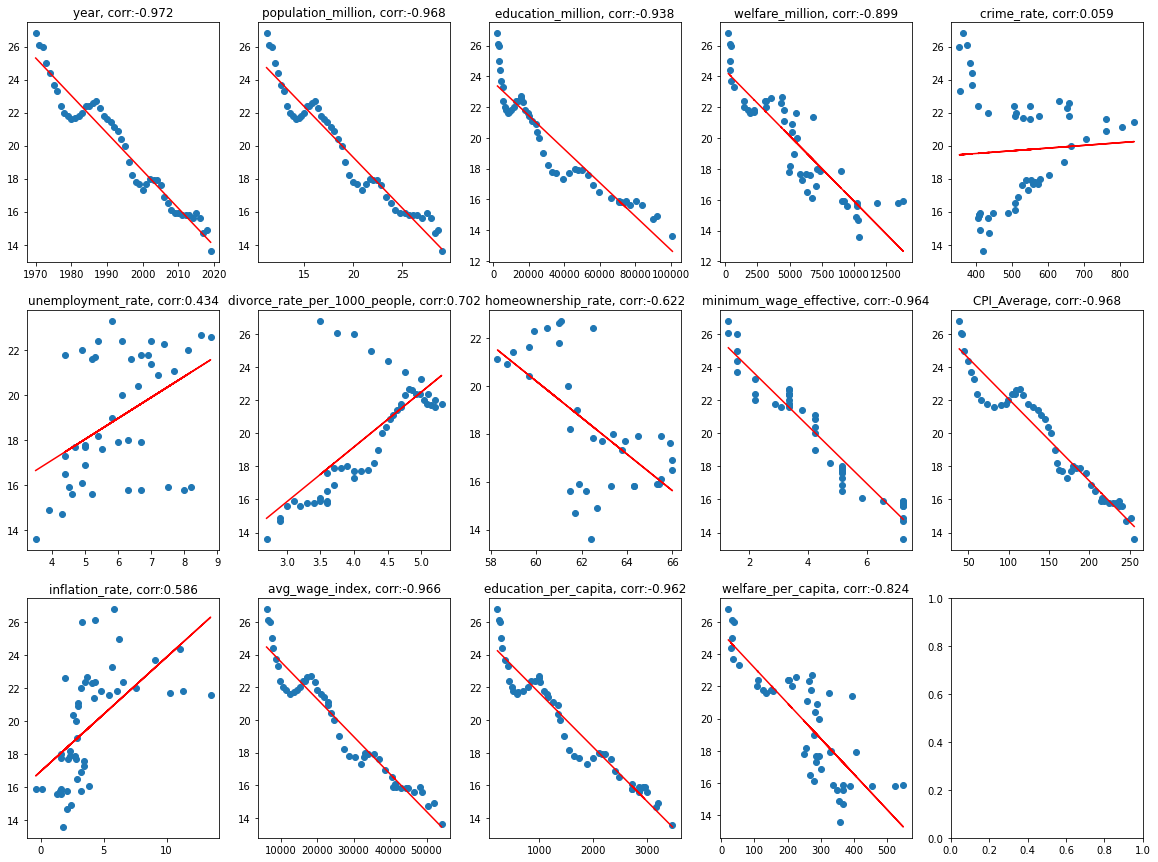

year  population_million  education_million  \
year                          1.000000            0.996556           0.960236   
population_million            0.996556            1.000000           0.976787   
education_million             0.960236            0.976787           1.000000   
welfare_million               0.950336            0.945076           0.899563   
crime_rate                   -0.014627           -0.098609          -0.225747   
unemployment_rate            -0.240132           -0.262518          -0.250206   
divorce_rate_per_1000_people -0.778699           -0.814492          -0.866295   
homeownership_rate            0.576144            0.565338           0.569647   
minimum_wage_effective        0.980673            0.980653           0.951601   
CPI_Average                   0.998577            0.991621           0.957218   
inflation_rate               -0.664574           -0.642195          -0.587704   
avg_wage_index                0.995021            0.998887           0.984208   
poverty_rate                 -0.971990           -0.968293          -0.937658   
education_per_capita          0.987683            0.993851           0.989025   
welfare_per_capita            0.843585            0.813731           0.718951   

                              welfare_million  crime_rate  unemployment_rate  \
year                                 0.950336   -0.014627          -0.240132   
population_million                   0.945076   -0.098609          -0.262518   
education_million                    0.899563   -0.225747          -0.250206   
welfare_million                      1.000000   -0.009793           0.005798   
crime_rate                          -0.009793    1.000000           0.417055   
unemployment_rate                    0.005798    0.417055           1.000000   
divorce_rate_per_1000_people        -0.721694    0.399158           0.367657   
homeownership_rate                   0.477560   -0.655071          -0.204421   
minimum_wage_effective               0.955982   -0.058420          -0.190451   
CPI_Average                          0.943620    0.015674          -0.218690   
inflation_rate                      -0.650201   -0.099203          -0.159167   
avg_wage_index                       0.931852   -0.093710          -0.270702   
poverty_rate                        -0.898589    0.059001           0.433722   
education_per_capita                 0.935175   -0.114646          -0.218802   
welfare_per_capita                   0.939398    0.250810           0.195359   

                              divorce_rate_per_1000_people  \
year                                             -0.778699   
population_million                               -0.814492   
education_million                                -0.866295   
welfare_million                                  -0.721694   
crime_rate                                        0.399158   
unemployment_rate                                 0.367657   
divorce_rate_per_1000_people                      1.000000   
homeownership_rate                               -0.540687   
minimum_wage_effective                           -0.742590   
CPI_Average                                      -0.767743   
inflation_rate                                    0.628081   
avg_wage_index                                   -0.823728   
poverty_rate                                      0.701567   
education_per_capita                             -0.829266   
welfare_per_capita                               -0.531539   

                              homeownership_rate  minimum_wage_effective  \
year                                    0.576144                0.980673   
population_million                      0.565338                0.980653   
education_million                       0.569647                0.951601   
welfare_million                         0.477560                0.955982   
crime_rate                             -0.655071               -0.058420   
unemplo

In [15]:
state = "Texas"
# crossplots(dataframe_with_data , target_variable_name, show_trendline=False|True)
crossplots(dataset_df.loc[dataset_df['state']==state],'poverty_rate', True)
dataset_df.loc[dataset_df['state']==state].corr()

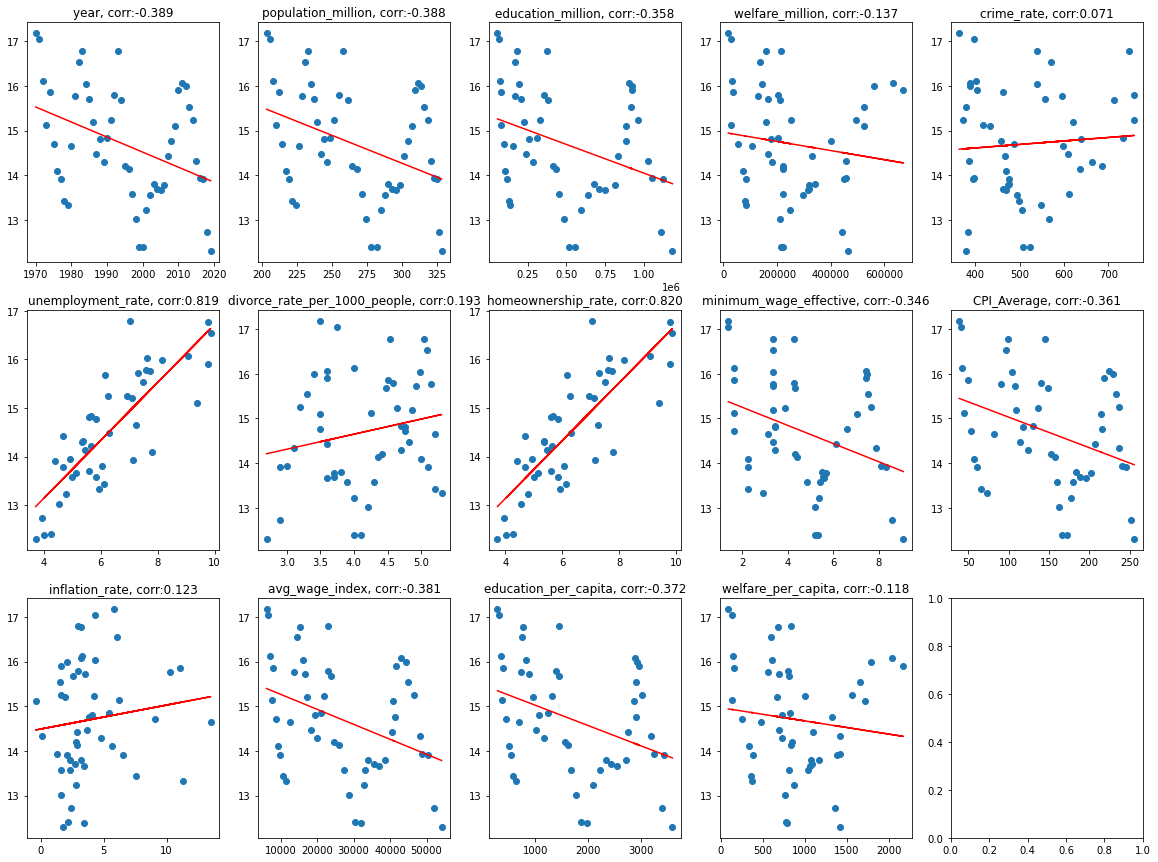

year  population_million  education_million  \
year                          1.000000            0.998085           0.978838   
population_million            0.998085            1.000000           0.976537   
education_million             0.978838            0.976537           1.000000   
welfare_million               0.789823            0.780628           0.825147   
crime_rate                   -0.310482           -0.353856          -0.463613   
unemployment_rate            -0.276082           -0.271674          -0.227536   
divorce_rate_per_1000_people -0.778699           -0.798716          -0.858069   
homeownership_rate           -0.275614           -0.271207          -0.227129   
minimum_wage_effective        0.985792            0.984212           0.982919   
CPI_Average                   0.998577            0.995955           0.972270   
inflation_rate               -0.664574           -0.663183          -0.606647   
avg_wage_index                0.995021            0.995775           0.992777   
poverty_rate                 -0.388680           -0.388094          -0.357556   
education_per_capita          0.989440            0.988182           0.997287   
welfare_per_capita            0.777106            0.767293           0.802512   

                              welfare_million  crime_rate  unemployment_rate  \
year                                 0.789823   -0.310482          -0.276082   
population_million                   0.780628   -0.353856          -0.271674   
education_million                    0.825147   -0.463613          -0.227536   
welfare_million                      1.000000   -0.389830           0.147441   
crime_rate                          -0.389830    1.000000           0.049307   
unemployment_rate                    0.147441    0.049307           1.000000   
divorce_rate_per_1000_people        -0.731888    0.665997           0.365514   
homeownership_rate                   0.147759    0.049174           0.999998   
minimum_wage_effective               0.879437   -0.378755          -0.183547   
CPI_Average                          0.849486   -0.283553          -0.259473   
inflation_rate                      -0.374633    0.171858           0.132713   
avg_wage_index                       0.862793   -0.387916          -0.271533   
poverty_rate                        -0.136877    0.070760           0.819322   
education_per_capita                 0.820233   -0.410410          -0.243466   
welfare_per_capita                   0.997573   -0.302985           0.189356   

                              divorce_rate_per_1000_people  \
year                                             -0.778699   
population_million                               -0.798716   
education_million                                -0.858069   
welfare_million                                  -0.731888   
crime_rate                                        0.665997   
unemployment_rate                                 0.365514   
divorce_rate_per_1000_people                      1.000000   
homeownership_rate                                0.365030   
minimum_wage_effective                           -0.785759   
CPI_Average                                      -0.767743   
inflation_rate                                    0.628081   
avg_wage_index                                   -0.823728   
poverty_rate                                      0.192536   
education_per_capita                             -0.835660   
welfare_per_capita                               -0.666002   

                              homeownership_rate  minimum_wage_effective  \
year                                   -0.275614                0.985792   
population_million                     -0.271207                0.984212   
education_million                      -0.227129                0.982919   
welfare_million                         0.147759                0.879437   
crime_rate                              0.049174               -0.378755   
unemplo

In [16]:
state = "National"
# crossplots(dataframe_with_data , target_variable_name, show_trendline=False|True)
crossplots(dataset_df.loc[dataset_df['state']==state],'poverty_rate', True)
dataset_df.loc[dataset_df['state']==state].corr()